# Paramagnetes e Antiferromagnetes Planares (Spins Livres vs Interactuantes)


In [2]:
import numpy as np
import numpy.random as rd
import scipy as sp
import matplotlib.pyplot as plt
import time
from numba import jit
from numba import float64
%matplotlib inline
t1 = time.time()

## Paramagnete Ideal

Um dos modelos mais simples para descrever o comportamento paramagnético de um sólido consiste num conjunto de momentos magnéticos binários ($\sigma_{\mathbf{r}}\!=\!\pm1$) independentes e localizados em pontos fixos do espaço. Neste TPC consideraremos que estes momentos estão localizados nos nodos de uma rede quadrada planar de dimensões $L\!\times\!L$ com condições fronteira periódicas. O hamiltoniano deste sistema na presença de um campo magnético é

$$
\mathcal{H}_{1}=-\mu B\sum_{\mathbf{r}}\sigma_{\mathbf{r}},
$$
onde $\mu\!>\!0$ é o momento magnético local e $B$ é o campo magnético aplicado. 

1. Começe por calcular, analiticamente, a função de partição canónica do sistema de $L^{2}$ spins. 

A função partição canónica vai ser dada por:
$$
Z_c (\beta, B,\mu) = \sum_{\sigma} e^{-\beta \mathcal{H_1}} =\sum_{\sigma} e^{-\beta \left (-\mu B\sum_{\mathbf{r}}\sigma_{\mathbf{r}}  \right)}
$$
Como as partículas são independentes, o somatório na exponencial pode ser simplificado:
$$
Z_{c}(\beta,B,\mu)=	\left(\sum_{\sigma}e^{\beta\mu B\sigma_{1}}\right)\dots\left(\sum_{\sigma}e^{\beta\mu BN_{1}}\right)\\
=	\left(\sum_{\sigma}e^{\beta\mu B\sigma_{1}}\right)^{N}\\
=	(e^{-\beta\mu B}+e^{\beta\mu B})^N\\
=	(2\cosh(\beta\mu B))^N\\
$$

In [2]:
# Responda Aqui

2. Calcule e represente as seguintes quantidades como função de $\beta\!=\!1/k_{B}T$ para $B\!=\{-1,-0.5,0.5,1\}$ e $\beta\in[0,1]$:

(a) A energia interna por spin

Seja $\epsilon = \frac{E}{N}$ a energia interna por spin:

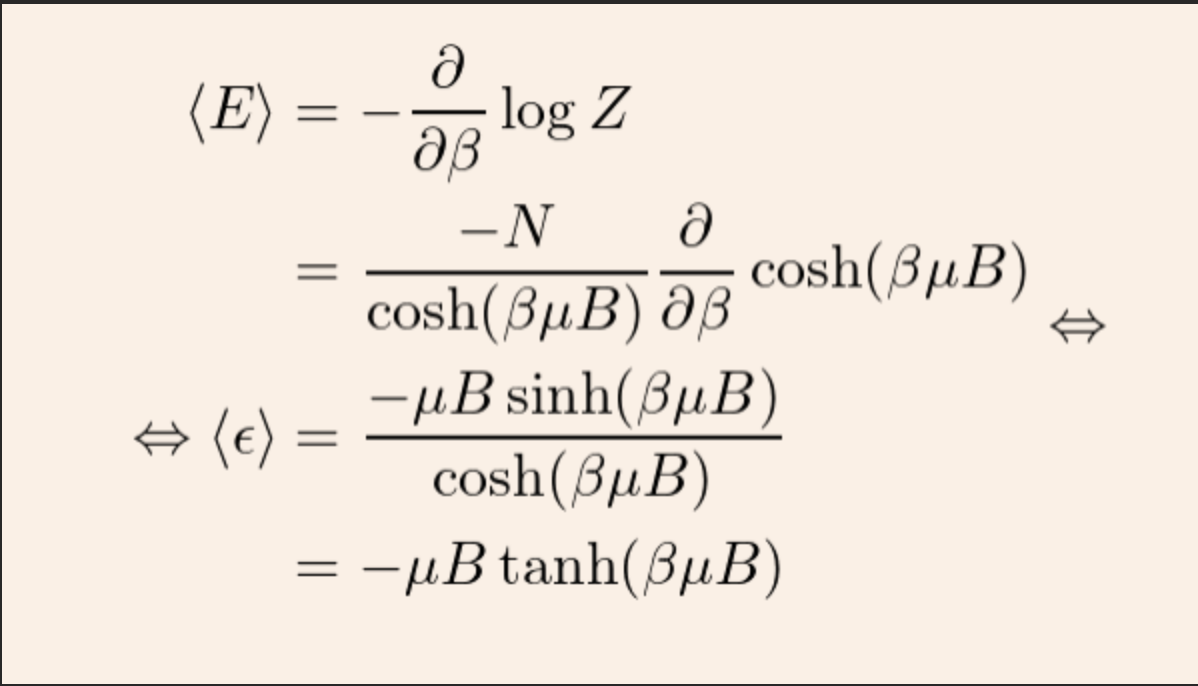

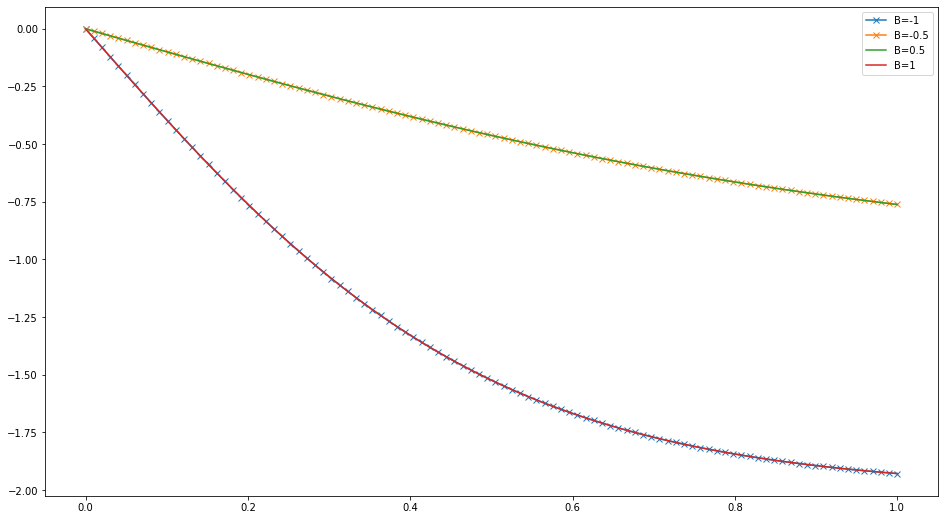

In [3]:
def epsilon(beta,mu,B):
    return -mu*B*np.tanh(beta*mu*B)

mu=2

betas = np.linspace(0,1,100)
bs = [-1,-0.5,0.5,1]
plt.figure(figsize=(16,9))
for i in bs:
    yy = epsilon(betas,mu,i)
    if i<0:
        plt.plot(betas,yy,"-x", label="B={}".format(i))
    else:
        plt.plot(betas,yy, label="B={}".format(i))
plt.legend()
plt.show()

(b) O calor específico a $B$ constante

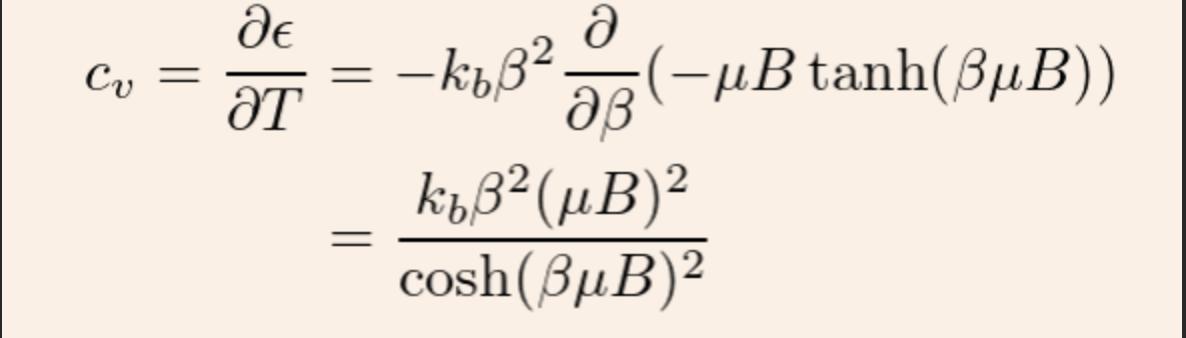

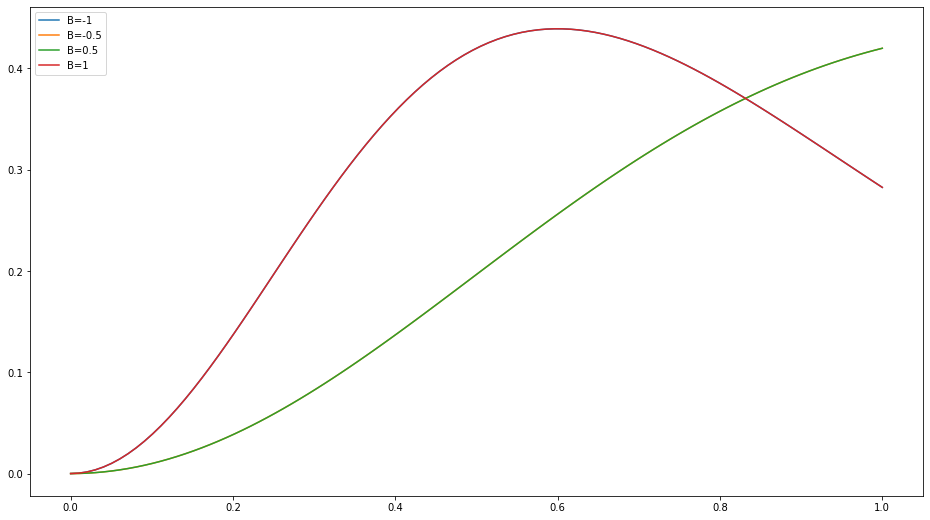

In [4]:
def cv(beta,mu,B):
    return beta**2 * (mu* B)**2 * np.cosh(beta*mu*B)**-2

plt.figure(figsize=(16,9))
for i in bs:
    yy = cv(betas,mu,i)
    plt.plot(betas,yy, label="B={}".format(i))
plt.legend()
plt.show()
    

(c) A magnetização por spin

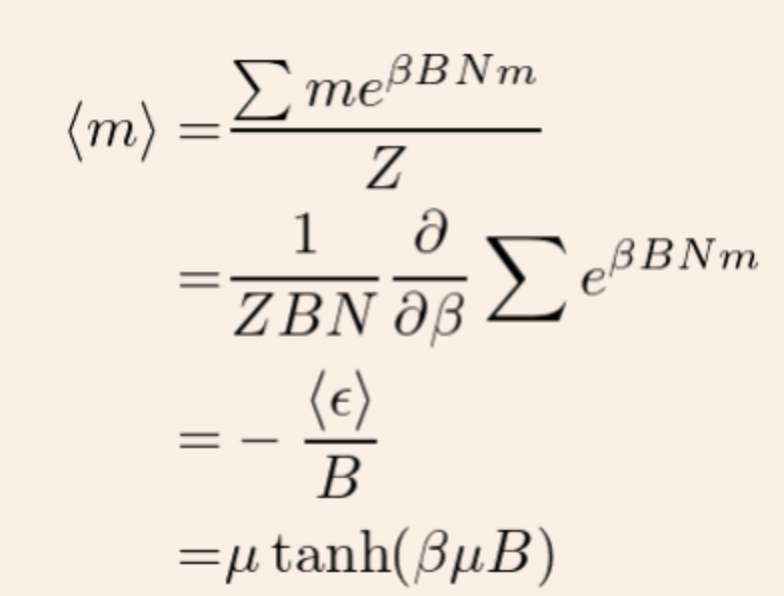

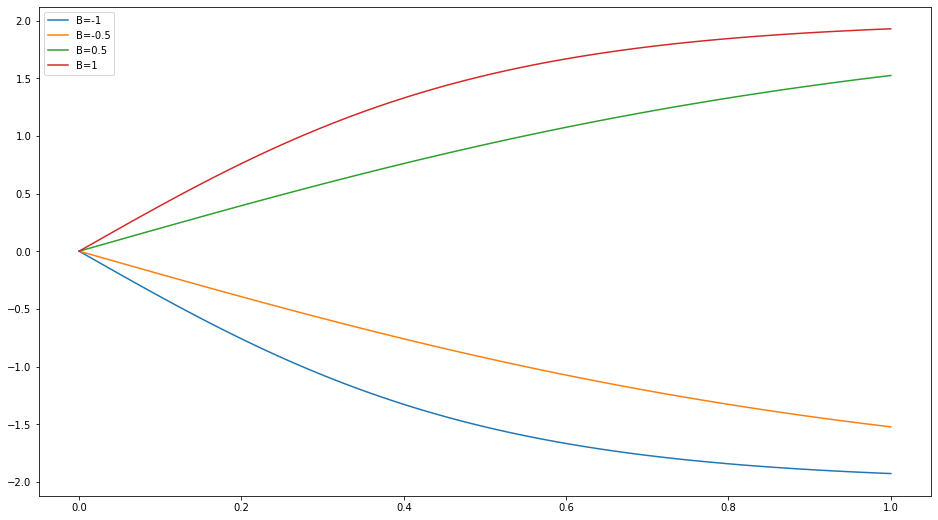

In [5]:
def magnetizacao(beta,mu,B):
    return mu*np.tanh(beta*mu*B)

plt.figure(figsize=(16,9))
for i in bs:
    yy = magnetizacao(betas,mu,i)
    plt.plot(betas,yy, label="B={}".format(i))
plt.legend()
plt.show()

(d) A susceptibilidade magnética por spin;

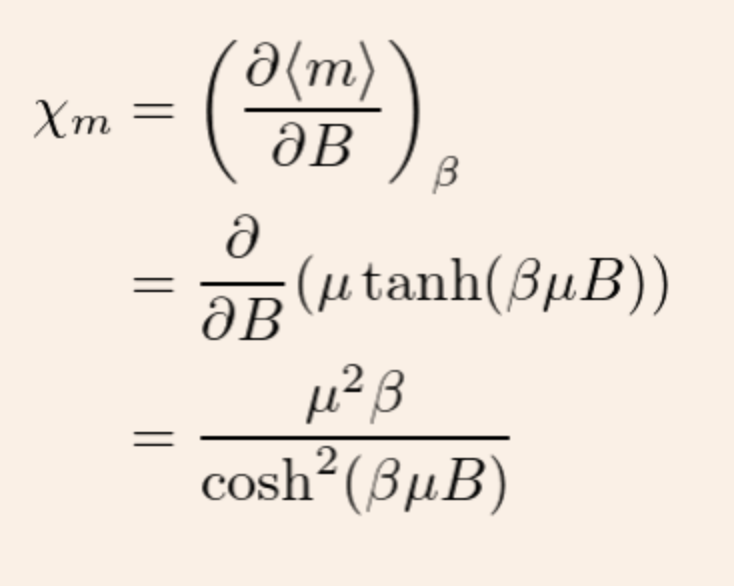

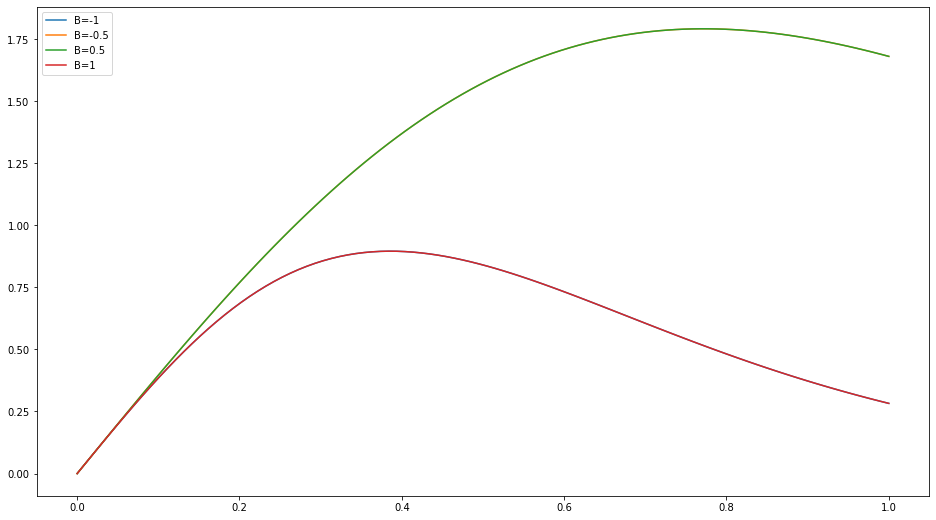

In [6]:
def magn_susc(beta,mu,B):
    return mu**2 * beta /(np.cosh(beta*mu*B)**2)

plt.figure(figsize=(16,9))
for i in bs:
    yy = magn_susc(betas,mu,i)
    plt.plot(betas,yy, label="B={}".format(i))
plt.legend()
plt.show()

3. As propriedades do mesmo sistema podem ser obtidas numericamente com recurso a uma dinâmica de Monte Carlo com o algoritmo de Metropolis (“Single Spin-Flip Metropolis”) a temperatura finita. A dinâmica é a seguinte:

(a) Gere uma configuração de spins aleatória;

(b) Escolha um dos spins aleatoriamente com igual probabilidade;

(c) Proponha-se a trocar o valor desse spin. Calcule a diferença de energia $\Delta E$ associada a esta mudança;

(d) Aceite a proposta com probabilidade $\min(1,e^{-\beta\Delta E})$
Os passos (b)$\to$(d) são o «Passo de Monte Carlo» que deve ser repetido um número N de vezes durante uma simulação. Escreva uma função que implemente esta dinâmica estocástica tendo $L$, $N$, $B$ e $\beta$ como argumento, retornando as magnetizações e energias ao longo do tempo. [Nota: As energias e magnetizações devem ser calculadas a cada iteração. Não guarde as configurações do sistema tempo-a-tempo em memória.]

#Responda Aqui

In [23]:
def single_spin_flip_metropolis(L,N,B,beta,mu=1):
    count = 0
    rede = rd.randint(2,size=L**2)*2-1
    rede = rede.reshape(L,L)
    
    delta_E_ud = np.min([1,np.exp(-beta*2*mu*B)])
    delta_E_du = np.min([1,np.exp(beta*2*mu*B)]) #dif Energia é a mesma em todos os casos, e só
                                                #depende do valor do spin que se propõe trocar
    magn = np.empty(N)
    en = np.empty(N)
    
    magn_in = np.sum(rede)
    
    for step in range(N):
        pos = (rd.randint(L),rd.randint(L)) #spin proposto para trocar
        if rede[pos[0],pos[1]] == 1:  #vemos se é "up" ou "down" para determinar o delta_E
            sinal = -1
            prob = delta_E_ud
        else:
            sinal = 1
            prob = delta_E_du
        if rd.random() < prob:  #passo de aceitação
            count += 1
            rede[pos[0],pos[1]] *= -1
            magn_in += sinal * 2 * mu
        magn[step] = magn_in
        en[step] = - magn_in * B
    print(count)
    return magn , en   
            
    
print(single_spin_flip_metropolis(8,10,1,1))
    


    

5
(array([12., 12., 14., 12., 12., 14., 16., 16., 18., 18.]), array([-12., -12., -14., -12., -12., -14., -16., -16., -18., -18.]))


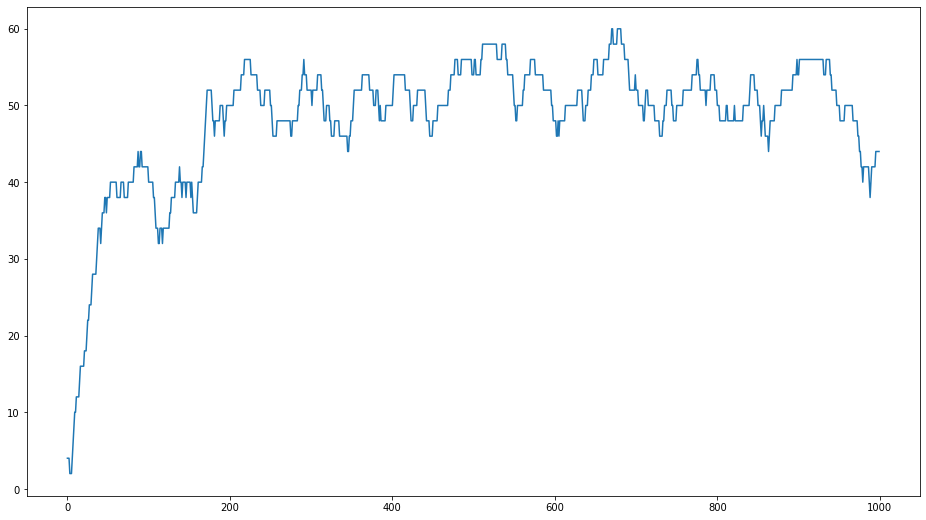

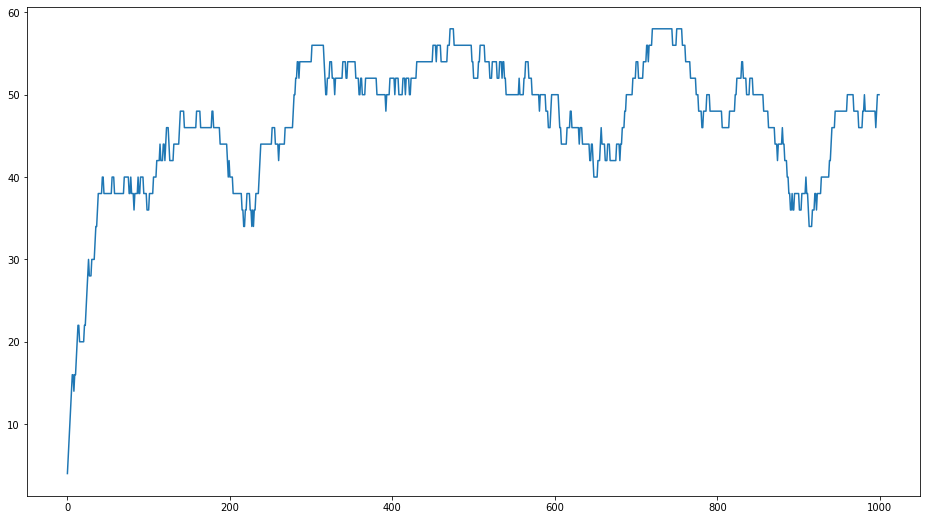

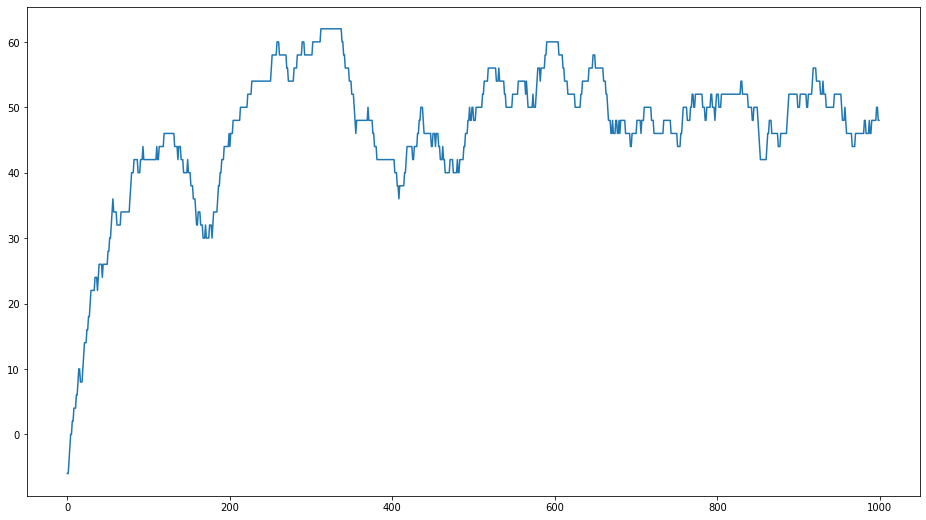

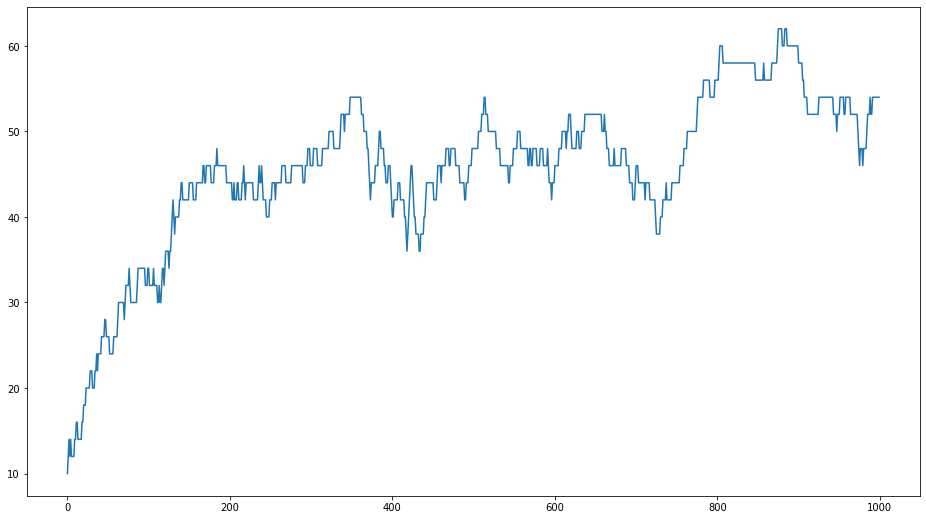

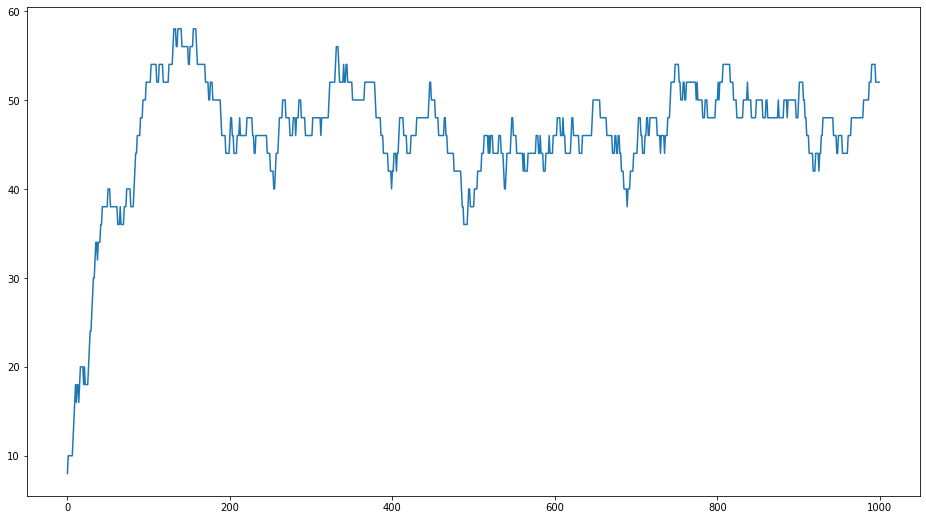

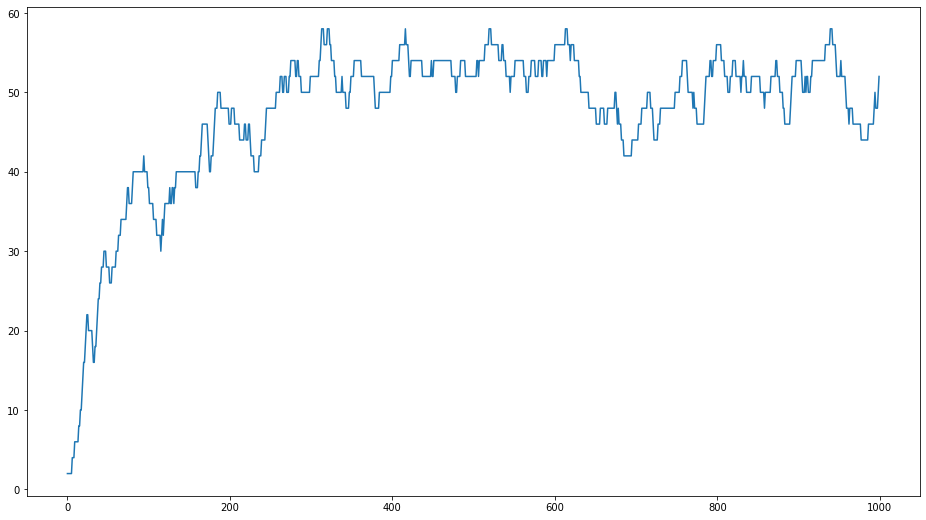

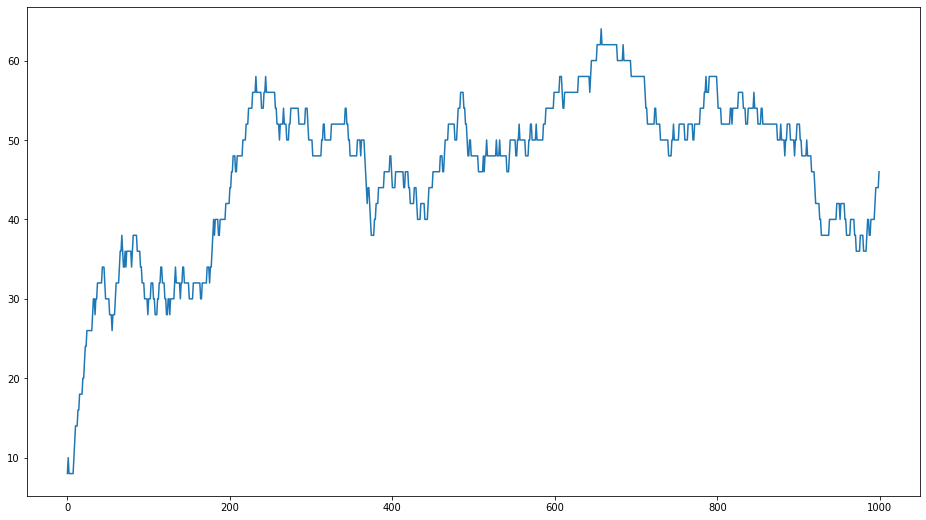

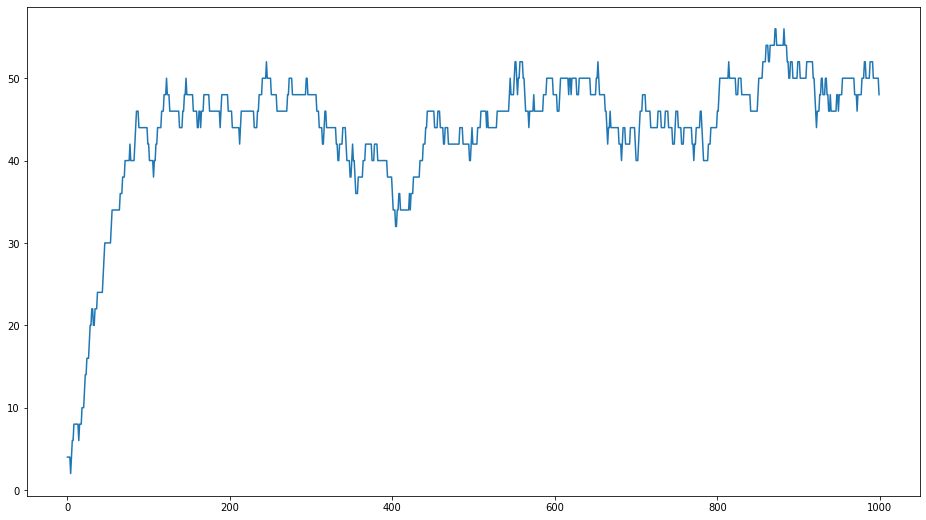

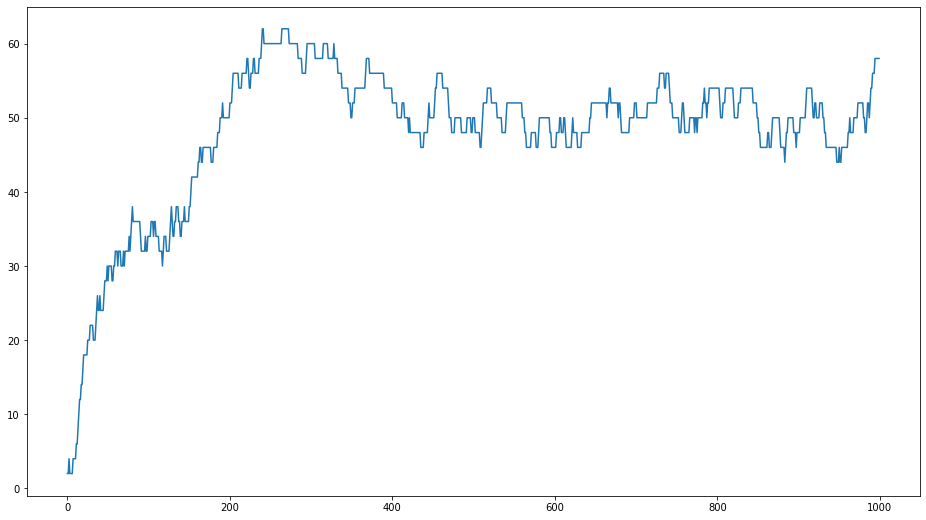

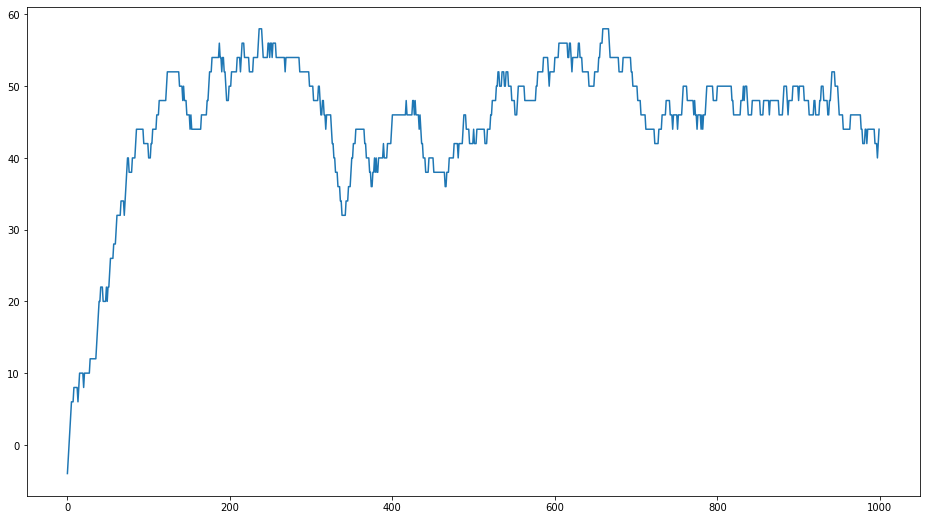

In [29]:
for i in range(10):
    path = "/Users/Andre_Octavio/Desktop/sample.txt{}".format(i)
    a = np.loadtxt(path)
    b = np.arange(0,1000,1)
    plt.figure(figsize=(16,9))
    plt.plot(b,a)
    plt.show()

4. Usando a função anterior, com $L\!=\!8$, $\beta\!=\!1$ e $B\!=\!1$ gere uma série temporal de configurações de valores da energia e magnetização ao longo de $N\!=\!500$ passos de Monte Carlo. Responda às seguintes perguntas:

(a) Porque é que a série temporal da magnetização só toma valores discretos?

Como a magnetização é proporcional à diferença entre dois inteiros (nomeadamente o nº de spins "up" e "down") segundo um fator de $\mu B$, então só vai poder tomar valores que são múltiplos inteiros de $2 \mu B$.

237


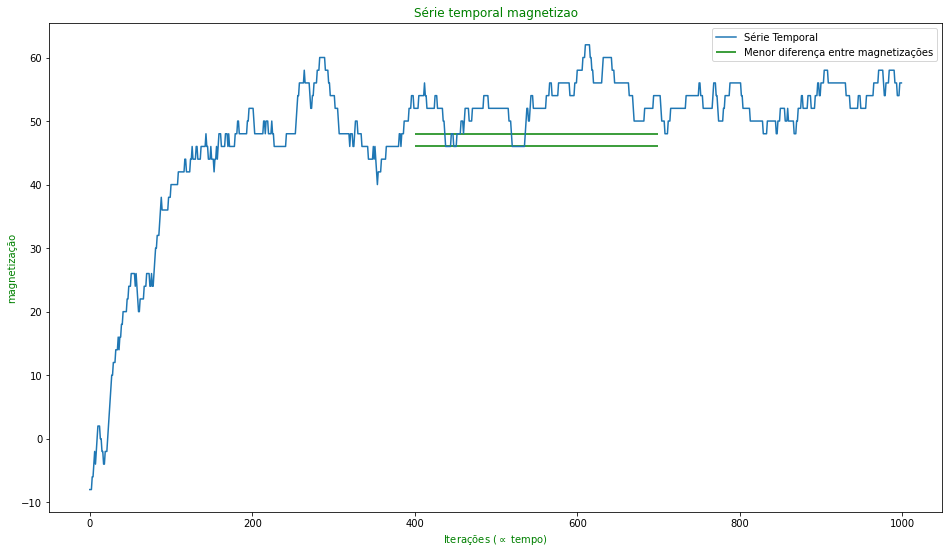

In [26]:
N= 1000
serie_m, serie_E = single_spin_flip_metropolis(8,N,1,1)
tt = np.arange(0,N,1)
plt.figure(figsize=(16,9))
plt.title(r"Série temporal magnetizao", color="green")
plt.plot(tt,serie_m, label="Série Temporal")
plt.hlines(46,400,700, color="green", label="Menor diferença entre magnetizações")
plt.hlines(48,400,700, color="green")  #diferenca de 2, visto que mu=B=1
plt.xlabel(r"Iterações ($\propto$ tempo)", color="green");plt.ylabel(r"magnetização", color="green")
plt.legend()
plt.show()


In [33]:
t1 = time.time()
single_spin_flip_metropolis(64,1000000,1,1)
t2 = time.time()

print(t2-t1)

238747
16.70766305923462


(b) Estime o tempo de termalização da magnetização, para este valor de $\beta$.

Vemos que a partir de 500 iterações, a magnetização começa a oscilar entre um valor médio, que está representado pela linha vermelha em baixo.

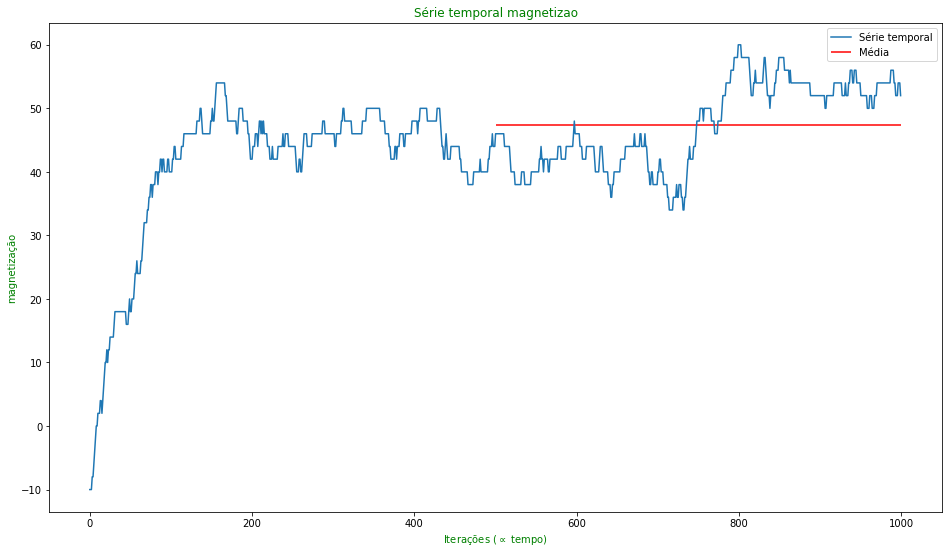

In [9]:
serie_m_termalizada = serie_m[500:]
serie_e_termalizada = serie_E[500:]
media_m = np.average(serie_m_termalizada)

plt.figure(figsize=(16,9))
plt.title(r"Série temporal magnetizao", color="green")
plt.plot(tt,serie_m, label="Série temporal")
plt.xlabel(r"Iterações ($\propto$ tempo)", color="green");plt.ylabel(r"magnetização", color="green")
plt.hlines(media_m,500,1000, color="red", label="Média")
plt.legend()
plt.show()

(c) Calcule a média e variância para a magnetização e a energia total. Como se relacionam estas variâncias com a susceptibilidade magnética e o calor específico, respectivamente?

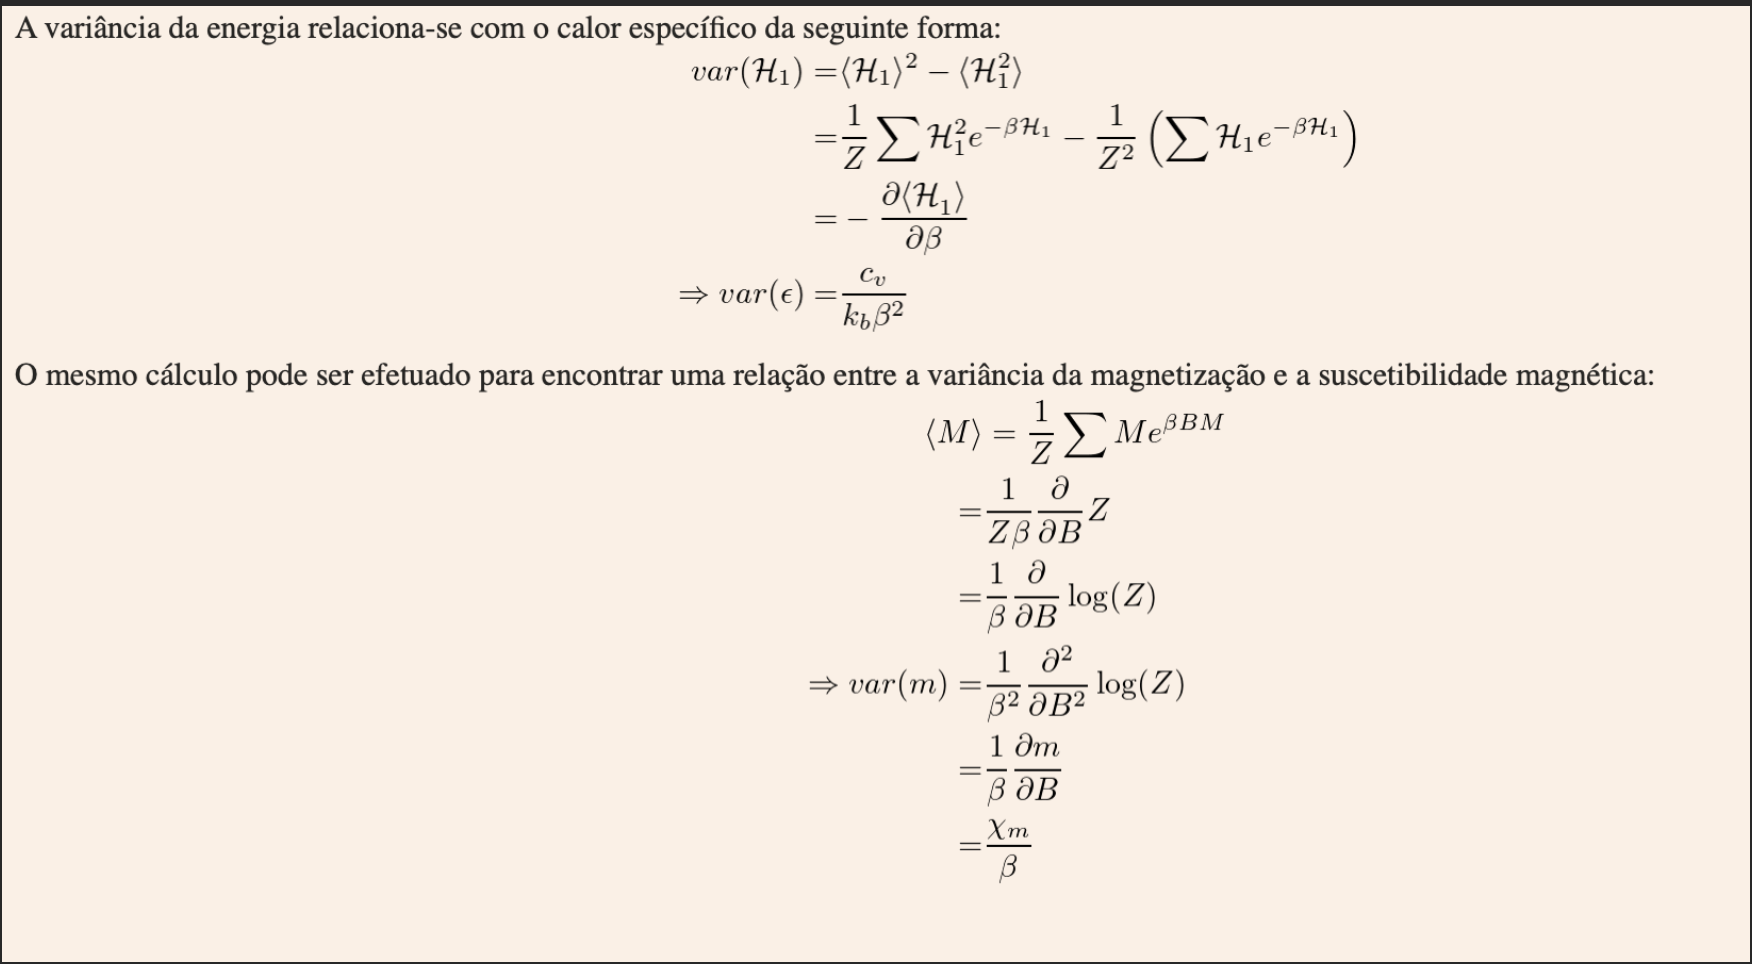

In [10]:
# Responda Aqui

5. Para $10$ valores de $\beta$ entre $0.01$ e $2$, e $N\!=\!10^{5}$ passos, estime o tempo de termalização da magnetização. Represente a série temporal de $M$ só para um conjunto representativo de $\beta$s. 

Em todas as séries temporais, a termalização parece estar bem establecida após as 1000 iterações. Note-se no entanto que para $\beta$ menores, a termalização parece acontecer mais cedo do que nos sitemas de baixas temperaturas, resultado que é esperado fisicamente, pois sistemas de baixas temperaturas demoram mais tempo a percorrer as várias configurações.

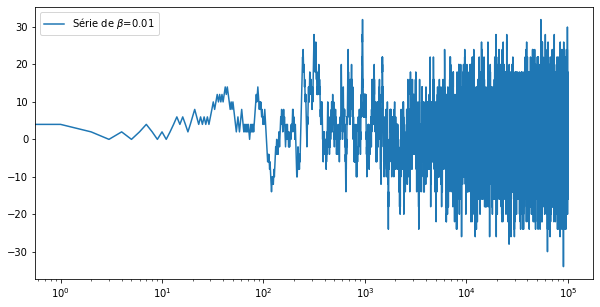

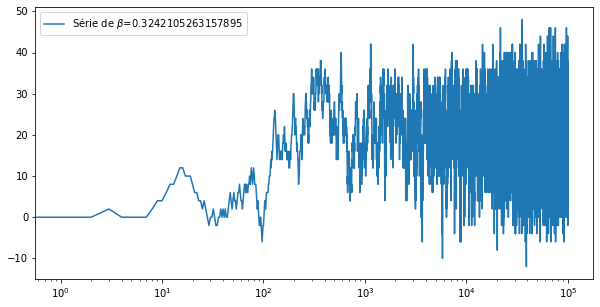

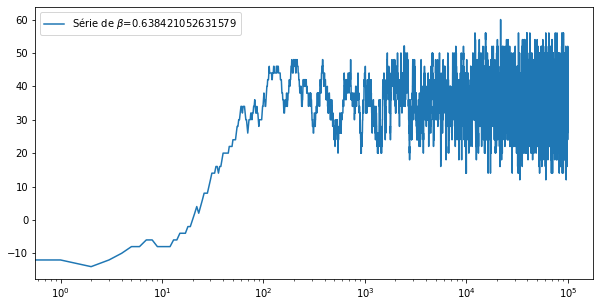

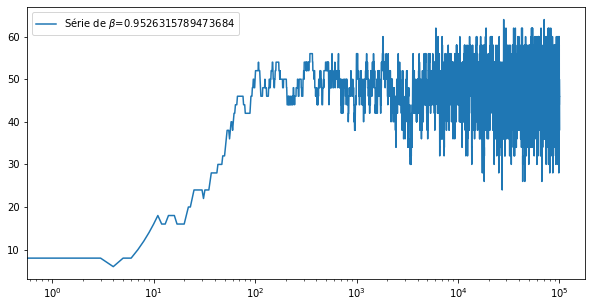

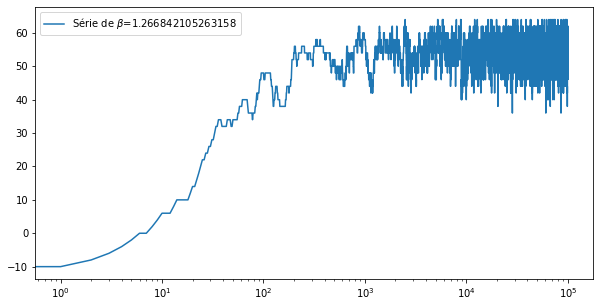

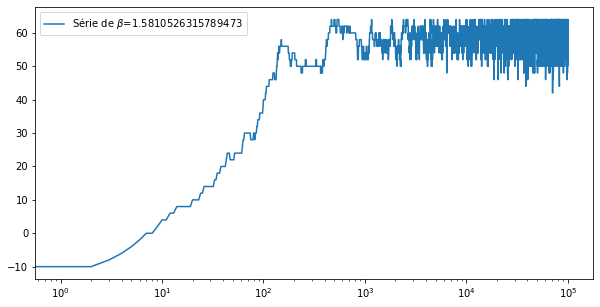

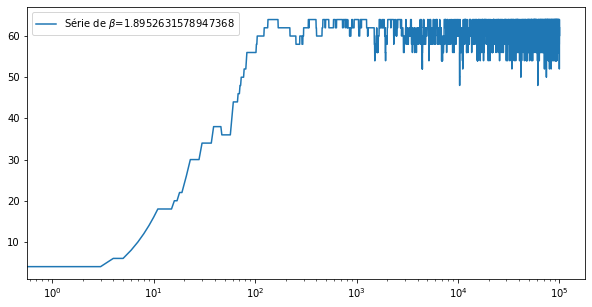

In [11]:
n_betas = 20
betas = np.linspace(0.01,2,n_betas)
N = int(1e5)

arrays_m_series = np.empty((n_betas,int(1e5)))
arrays_e_series = np.empty((n_betas,int(1e5)))

for k,i in enumerate(betas):
    arrays_m_series[k], arrays_e_series[k] = single_spin_flip_metropolis(8,N,1,i)
    if k%3 == 0:
        plt.figure(figsize=(10,5))
        plt.plot(arrays_m_series[k], label=r"Série de $\beta$={}".format(i))
        plt.xscale("log")
        plt.legend()
        plt.show()

6. Represente a magnetização média, a energia média, a susceptibilidade magnética e o calor específico (a B constante) como função de $\beta$. Compare com as curvas analíticas. 

Como se observa nos gráficos, os resultados obtidos analiticamente e através do método de Monte-Carlo são bastante concordantes. De facto, os resultados obtidos pelo método de M-C descrevem os resultados teóricos em toda a gama de $\beta$. Contudo, para $\beta$ baixos, a convergência é melhor visto que os tempos de termalização são menores.

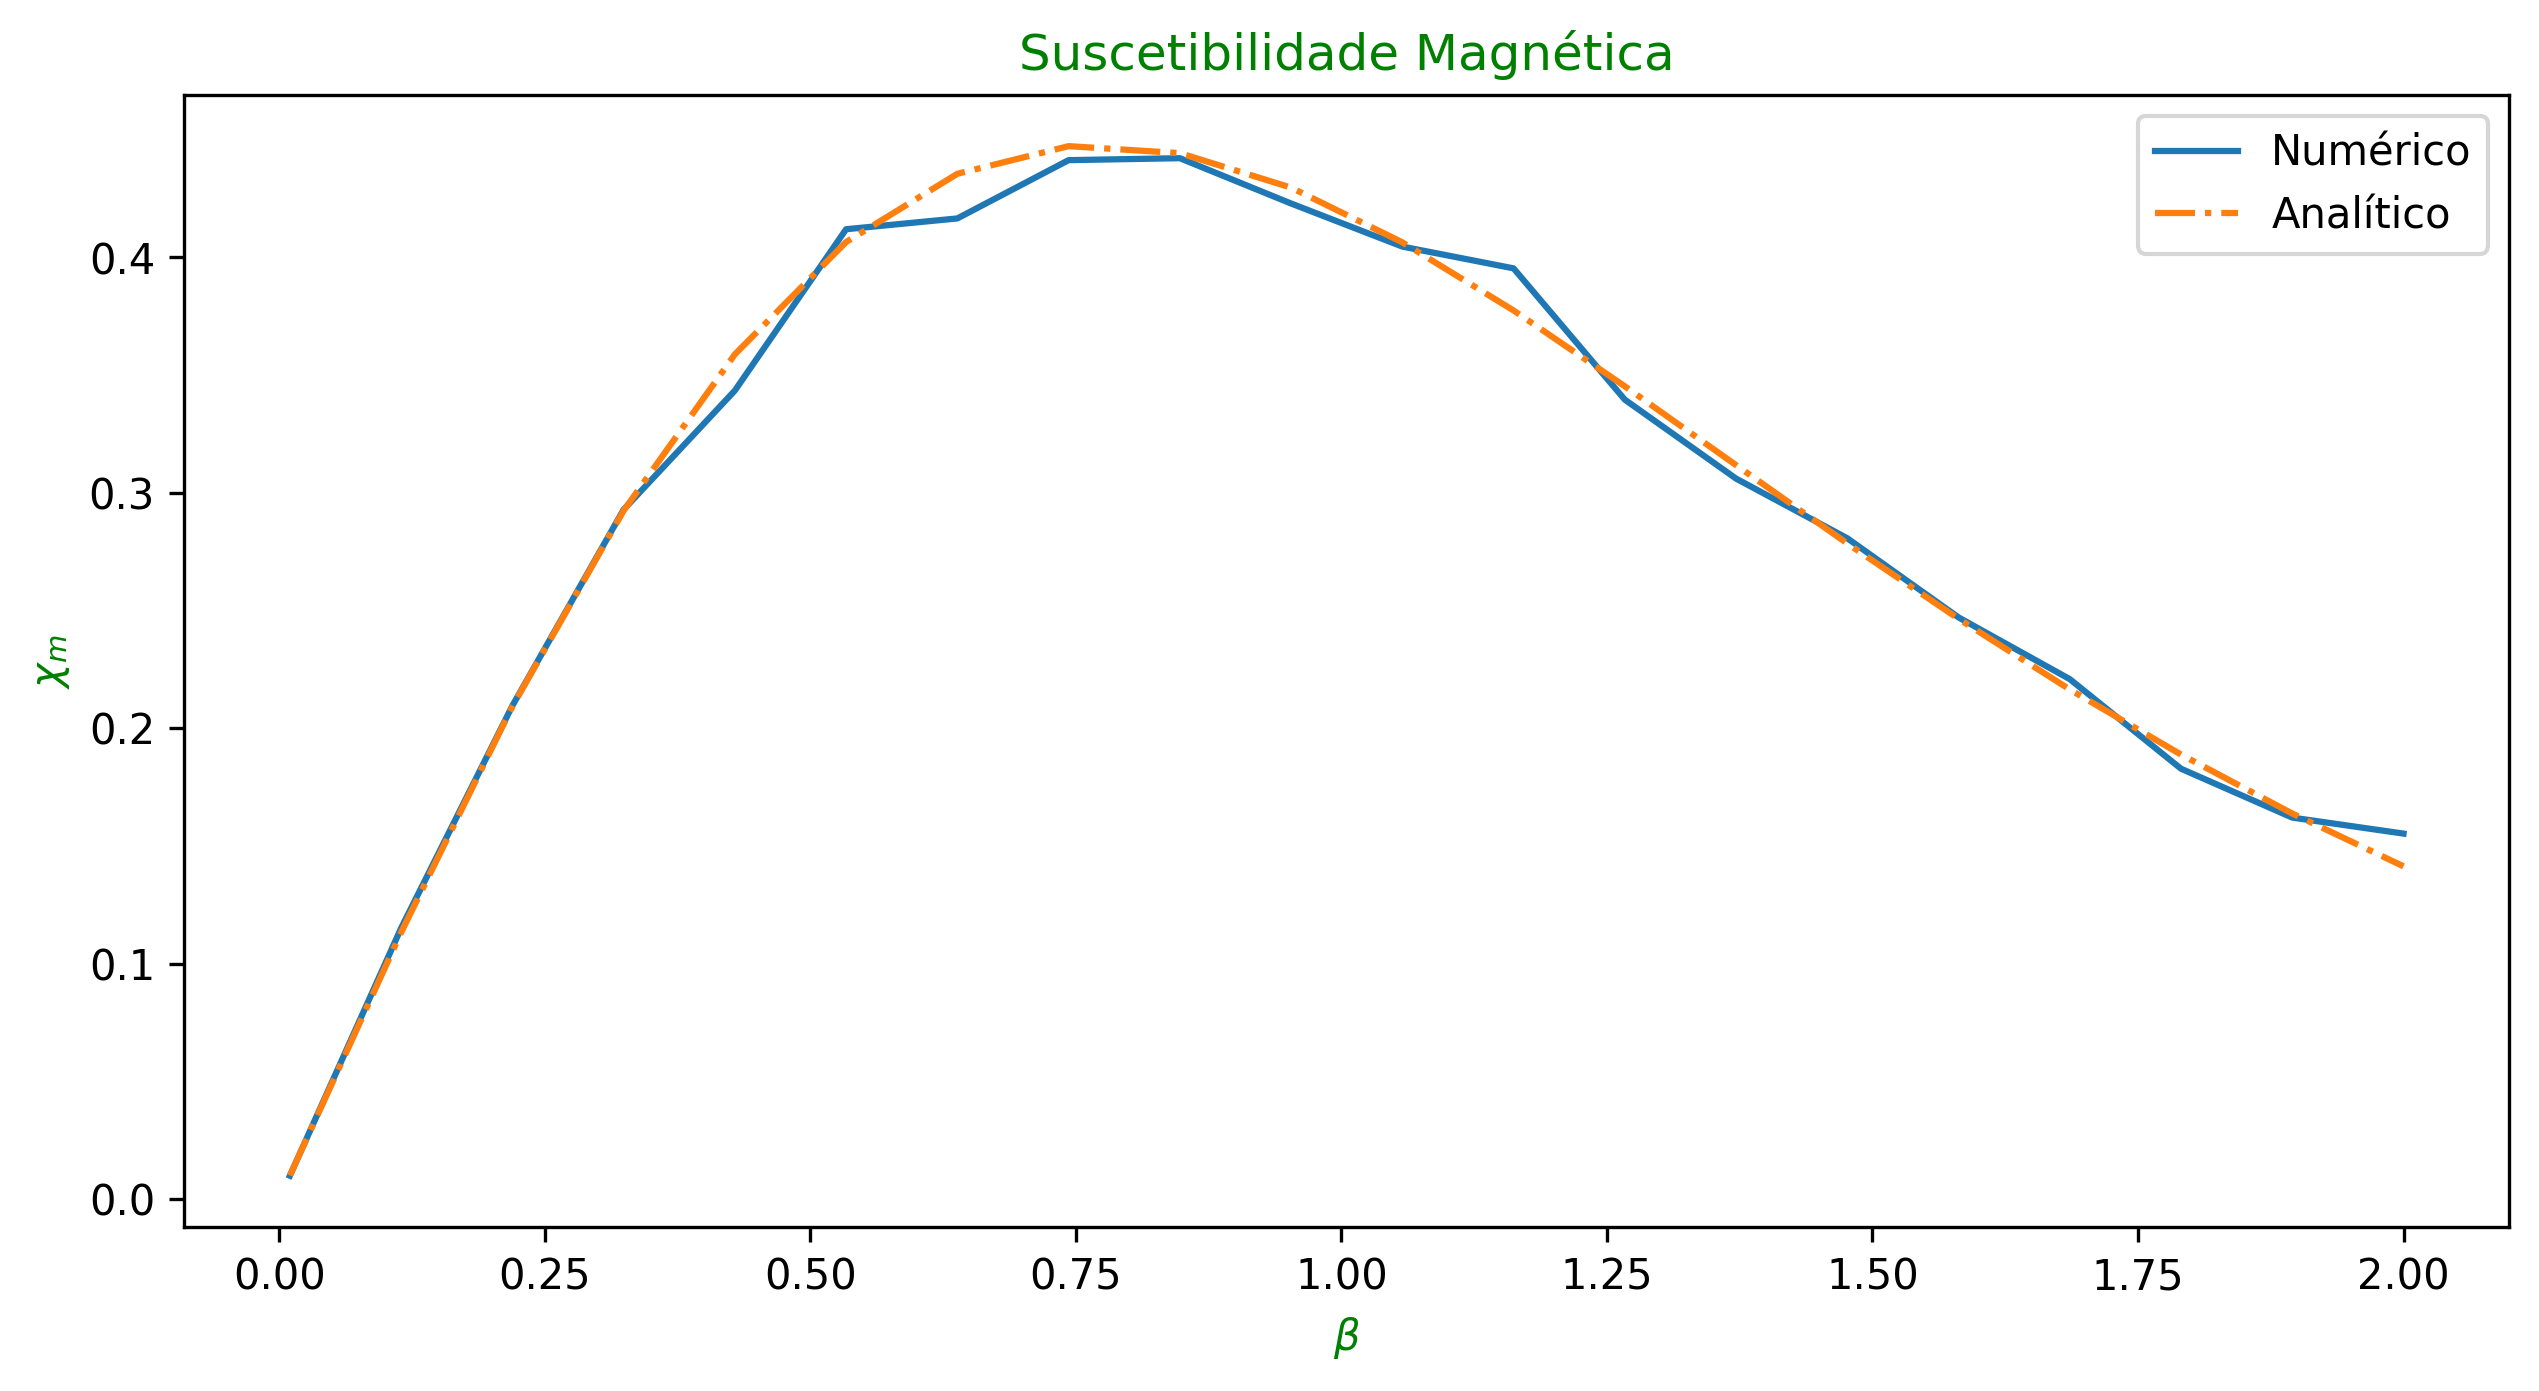

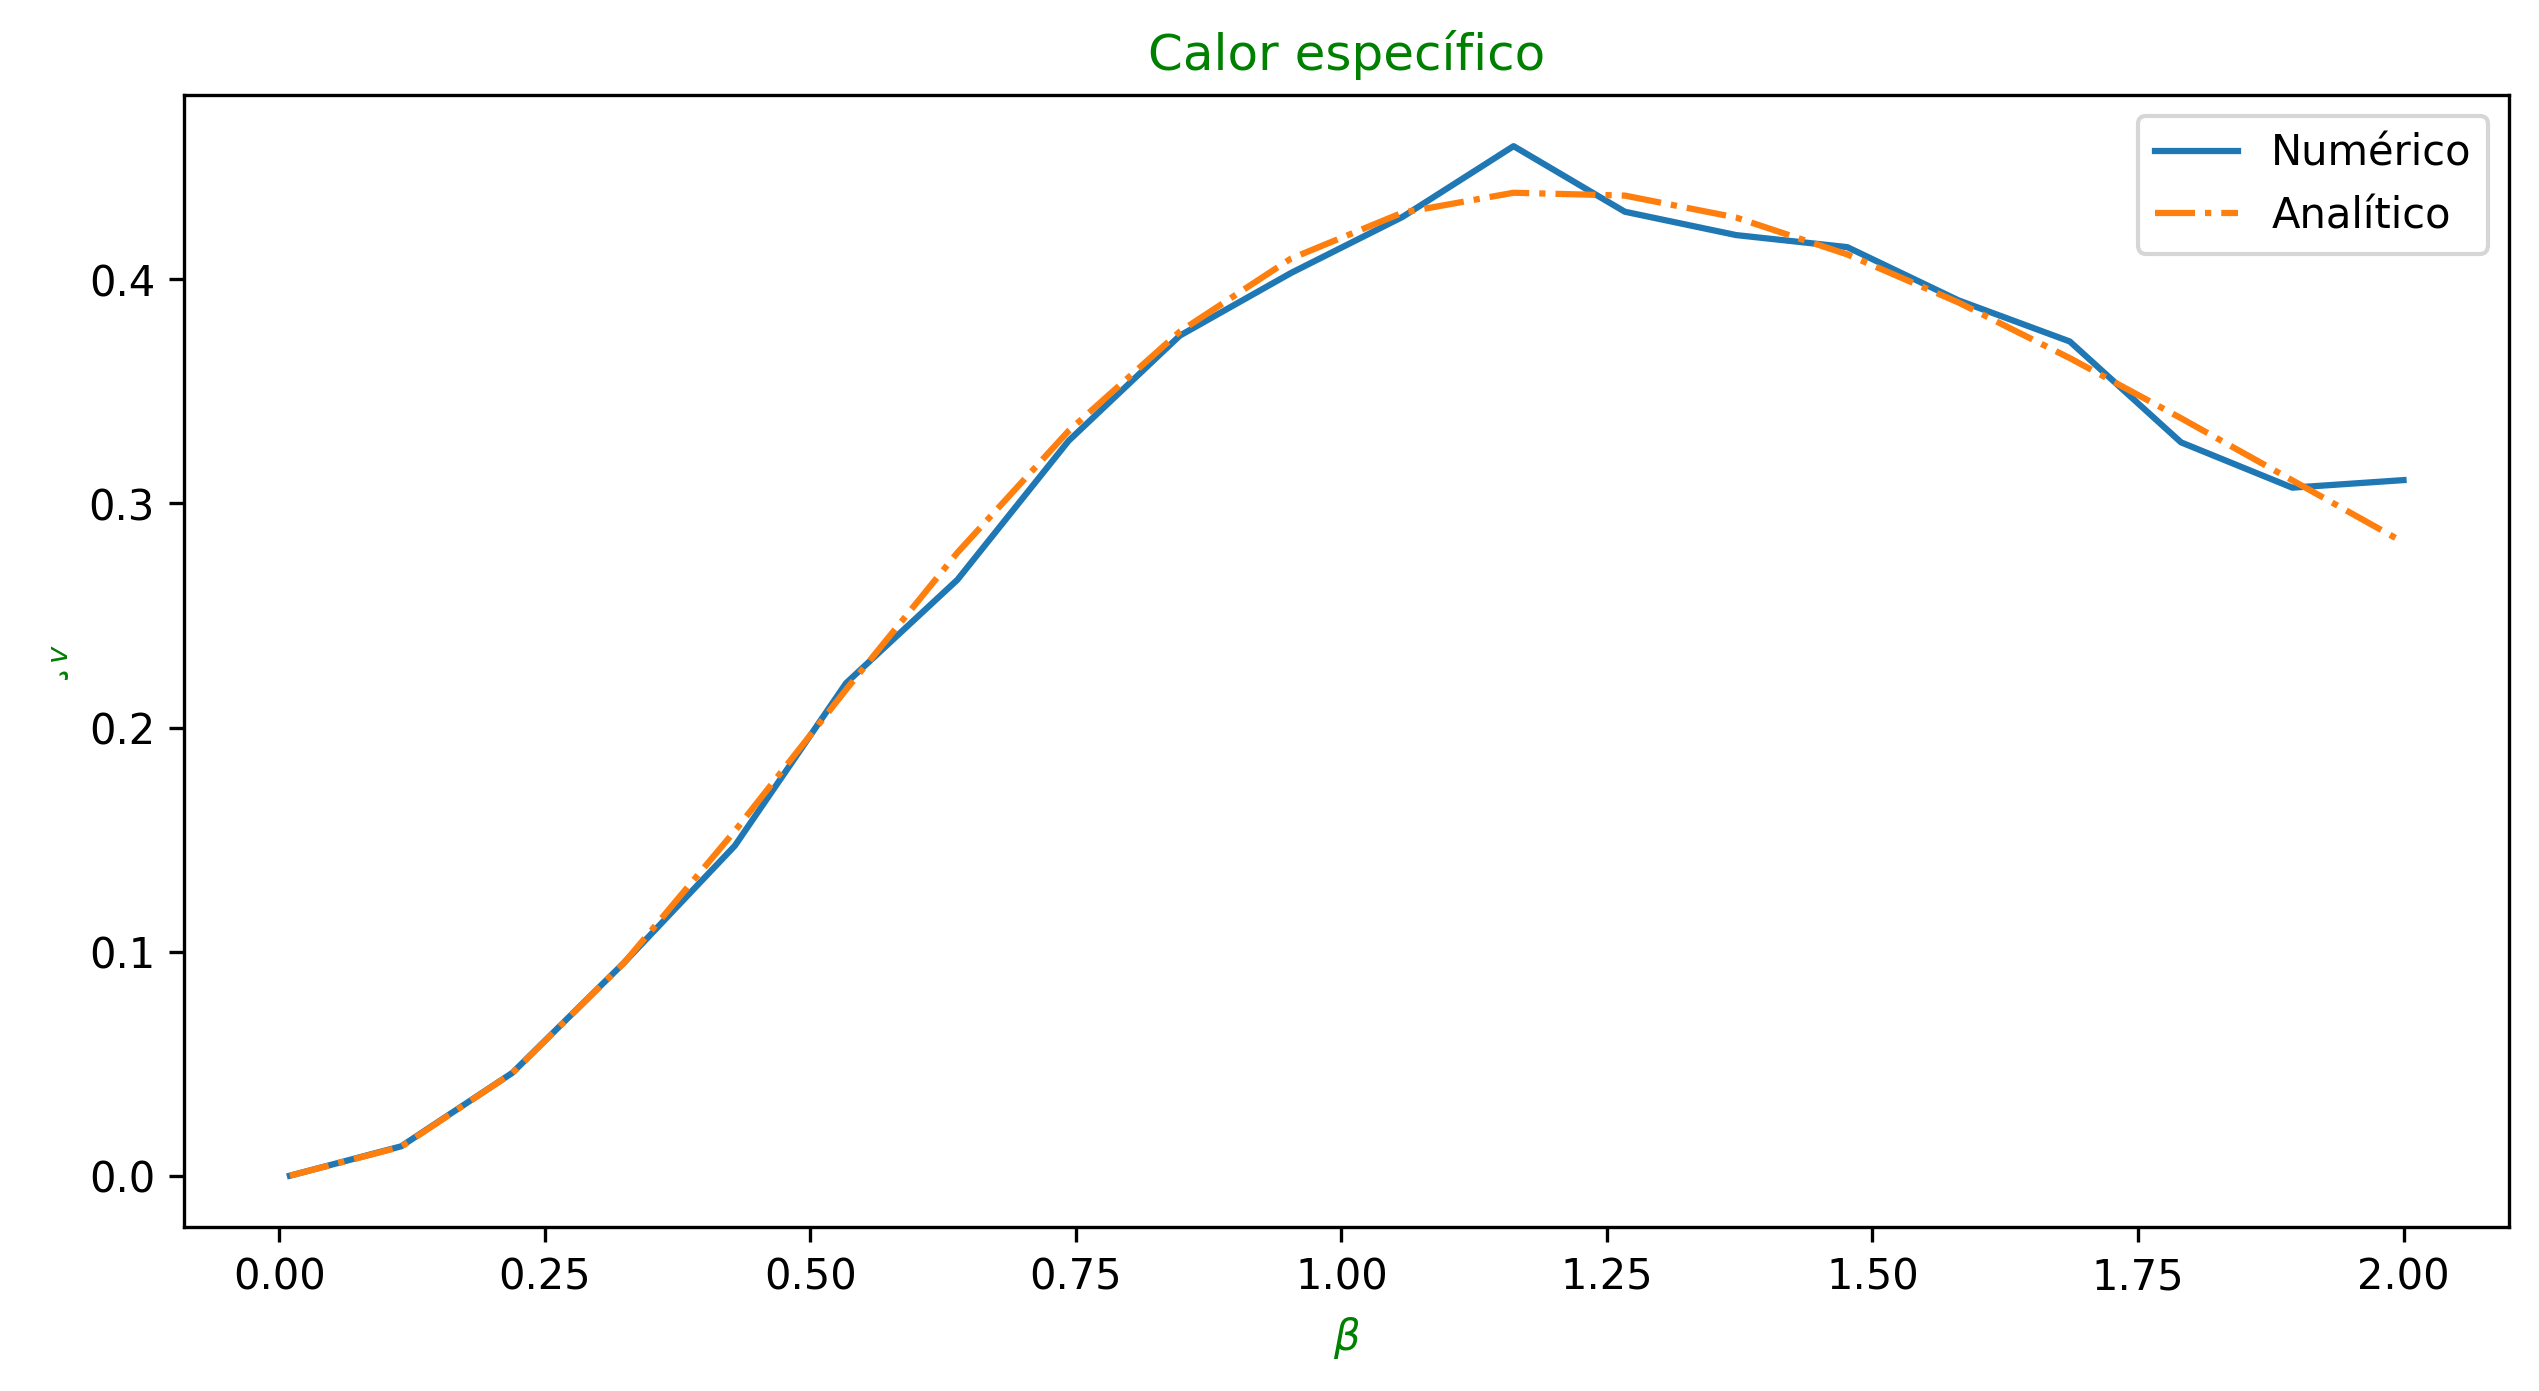

In [12]:
arrays_m_termalizados = arrays_m_series[:,1000:]
arrays_e_termalizados = arrays_e_series[:,1000:]

m_med, e_med = np.empty(n_betas), np.empty(n_betas)
m_var, e_var = np.empty(n_betas), np.empty(n_betas)

for i in range(n_betas):
    m_med[i], e_med[i] = np.average(arrays_m_termalizados[i,:]), np.average(arrays_e_termalizados[i,:])
    m_var[i], e_var[i] = np.var(arrays_m_termalizados[i,:]), np.var(arrays_e_termalizados[i,:])
    

plt.figure(figsize=(10,5), dpi=300)
plt.title(r"Suscetibilidade Magnética", color="green")
plt.plot(betas, betas * m_var/64, label="Numérico")
plt.plot(betas, magn_susc(betas,1,1),"-.", label="Analítico")
plt.xlabel(r"$\beta$", color="green");plt.ylabel(r"$\chi_m$", color="green")
plt.legend()
plt.show()

plt.figure(figsize=(10,5), dpi=300)
plt.title(r"Calor específico", color="green")
plt.plot(betas,betas**2*e_var/64, label="Numérico")
plt.plot(betas,cv(betas,1,1),"-.", label="Analítico")
plt.xlabel(r"$\beta$", color="green");plt.ylabel(r"$\c_v$", color="green")
plt.legend()
plt.show()
    

## Correções devido a Interações Spin-Spin

Na vida real, os momentos magnéticos num sólido não são independentes mas interagindo mutuamente de forma a favorecer um alinhamento paralelo (ferromagnético - FM) ou antiparalelo (antiferromagnético - AFM). Neste exercicio, avaliaremos os efeitos de uma interação AFM de curto-alcance dada pelo seguinte hamiltoniano

$$
\mathcal{H}_{2}=\underset{\mathcal{H}_{1}}{\underbrace{-\mu B\sum_{\mathbf{r}}\sigma_{\mathbf{r}}}}+\frac{J}{2}\:\underset{\mathcal{V}}{\underbrace{\sum_{\mathbf{r}}\left(\sigma_{\mathbf{r}}\sigma_{\mathbf{r}+x}\!+\!\sigma_{\mathbf{r}}\sigma_{\mathbf{r}-x}\!+\!\sigma_{\mathbf{r}}\sigma_{\mathbf{r}+y}\!+\!\sigma_{\mathbf{r}}\sigma_{\mathbf{r}-y}\right)}},
$$
onde $J\!>\!0$ mede a força da interação entre primeiros vizinhos na rede. O cálculo de médias térmicas em sistemas com interações é um problema complexo e, geralmente, impossível de resolver. Ainda assim, no limite $J\!\gg\!k_{B}T$ é possível obter aproximações para a média de uma quantidade $Q(\{\sigma_{\mathbf{r}}\})$ através de uma expansão em cumulantes [Ver Págs. 126-130 do Kardar para mais detalhe]. Na ordem mais baixa em $\beta J$, temos

$$
<Q>=<Q>_{0}\!-\!\beta J\left(<\mathcal{V}Q>_{0}\!\!-\!<\mathcal{V}>_{0}\! <Q>_{0}\right)+\mathcal{O}\left(\beta J\right)^{2},
$$
onde $<\cdots>$ e $<\cdots>_{0}$ são médias no ensemble canónico com e sem interações, respectivamente. No que se segue vamos tomar $Q$ como sendo a magnetização total e a energia do sistema, de modo a calcular as correções devido a $\mathcal{V}$ visíveis a altas temperaturas.

1. Para calcular as correções acima devido às interações AFM será necessário conhecer a expressão das funções de correlação entre 2 3 e 4 spins, calculadas na ausência de interações. Sabendo que

$$
<\sigma_{\mathbf{r}_{1}}\sigma_{\mathbf{r}_{2}}\!\!>_{0}=\delta_{\mathbf{r}_{1},\mathbf{r}_{2}}\!+\!(1\!-\!\delta_{\mathbf{r}_{1},\mathbf{r}_{2}})\tanh^{2}\!x.
$$

$$
<\sigma_{\mathbf{r}_{1}}\sigma_{\mathbf{r}_{2}}\sigma_{\mathbf{r}_{3}}\!\!>_{0}=\begin{cases}
\tanh\!x & \text{pelo menos dois $\mathbf{r}_{i}$ iguais}\\
\tanh^{3}\!x & \text{todos os $\mathbf{r}_{i}$ diferentes}
\end{cases}
$$

$$
<\sigma_{\mathbf{r}_{1}}\sigma_{\mathbf{r}_{2}}\sigma_{\mathbf{r}_{3}}\sigma_{\mathbf{r}_{4}}\!\!>_{0} = \begin{cases}
\tanh^{4}\!x & \text{todos os $\mathbf{r}_{i}$ diferentes}\\
\tanh^{2}\!x & \text{2 $\mathbf{r}_{i}$ iguais e dois diferentes}\\
1 & \text{4 ou 2+2 $\mathbf{r}_{i}$ iguais}
\end{cases}
$$

onde $x=\beta\mu B$. Escreva três funções $\texttt{Python}$ que calculem estas quantidades para qualquer combinação de pontos da rede e valores arbitrários de $x$.

#Responda Aqui

In [13]:
#Primeiras 3 funcções são triviais
def check(r1,r2, eps=1e-4):
    return np.allclose(r1,r2,eps)

def inter_2(r1,r2, beta, B, mu=1, eps=1e-4):
    delta = 0
    if np.allclose(r1,r2, eps):
        delta += 1
    return delta + (1-delta)*np.tanh(beta * mu * B)**2

def inter_3(r1,r2,r3, beta, B, mu=1, eps=1e-4):
    if np.allclose(r1,r2, eps) or np.allclose(r1,r3, eps) or np.allclose(r2,r3, eps):
        return np.tanh(beta*B*mu)
    return  np.tanh(beta*B*mu)**3

def inter_4(r1,r2,r3,r4, beta, B,L, mu=1, eps=1e-4):
    tanh = np.tanh(beta*B)
    i1 = r1[0] + L*r1[1]  #indexação única dos elementos da rede de spins
    i2 = r2[0] + L*r2[1]
    i3 = r3[0] + L*r3[1]
    i4 = r4[0] + L*r4[1]
    indices = np.array([i1,i2,i3,i4])
    indices_unicos = len(np.unique(indices)) #verificam-se os índices únicos
    #casos triviais
    if indices_unicos == 4:
        return tanh**4
    if indices_unicos == 1:
        return 1
    if indices_unicos == 3:
        return tanh**2
    else: #distinguir entre 3iguais-1dif e 2+2 iguais
        vezes = np.count_nonzero(indices==i1)
        if vezes == 3:
            return tanh**2
        return 1

1. Usando as funções da alínea anterior verifique numericamente os seguintes resultados: [Sugestão: Comece por relacionar estas médias com as funções de correlações entre spins da alínea anterior. Calcule para redes de $4^{2}$, $6^{2}$ e $8^{2}$ spins.]

(a) $<\mathcal{H}_{1}>_{0}=-\mu BL^{2}\tanh\!\left(\beta\mu B\right)$;

Para verificar numericamente os resultados neste exercício, percorre-se a grelha LxL dos spins e em cada posição somam-se as correlações necessárias (que estão indicadas nos prints em baixo). Em todas as alíneas b)-d) se verificam os resultados analíticos por este método numérico.

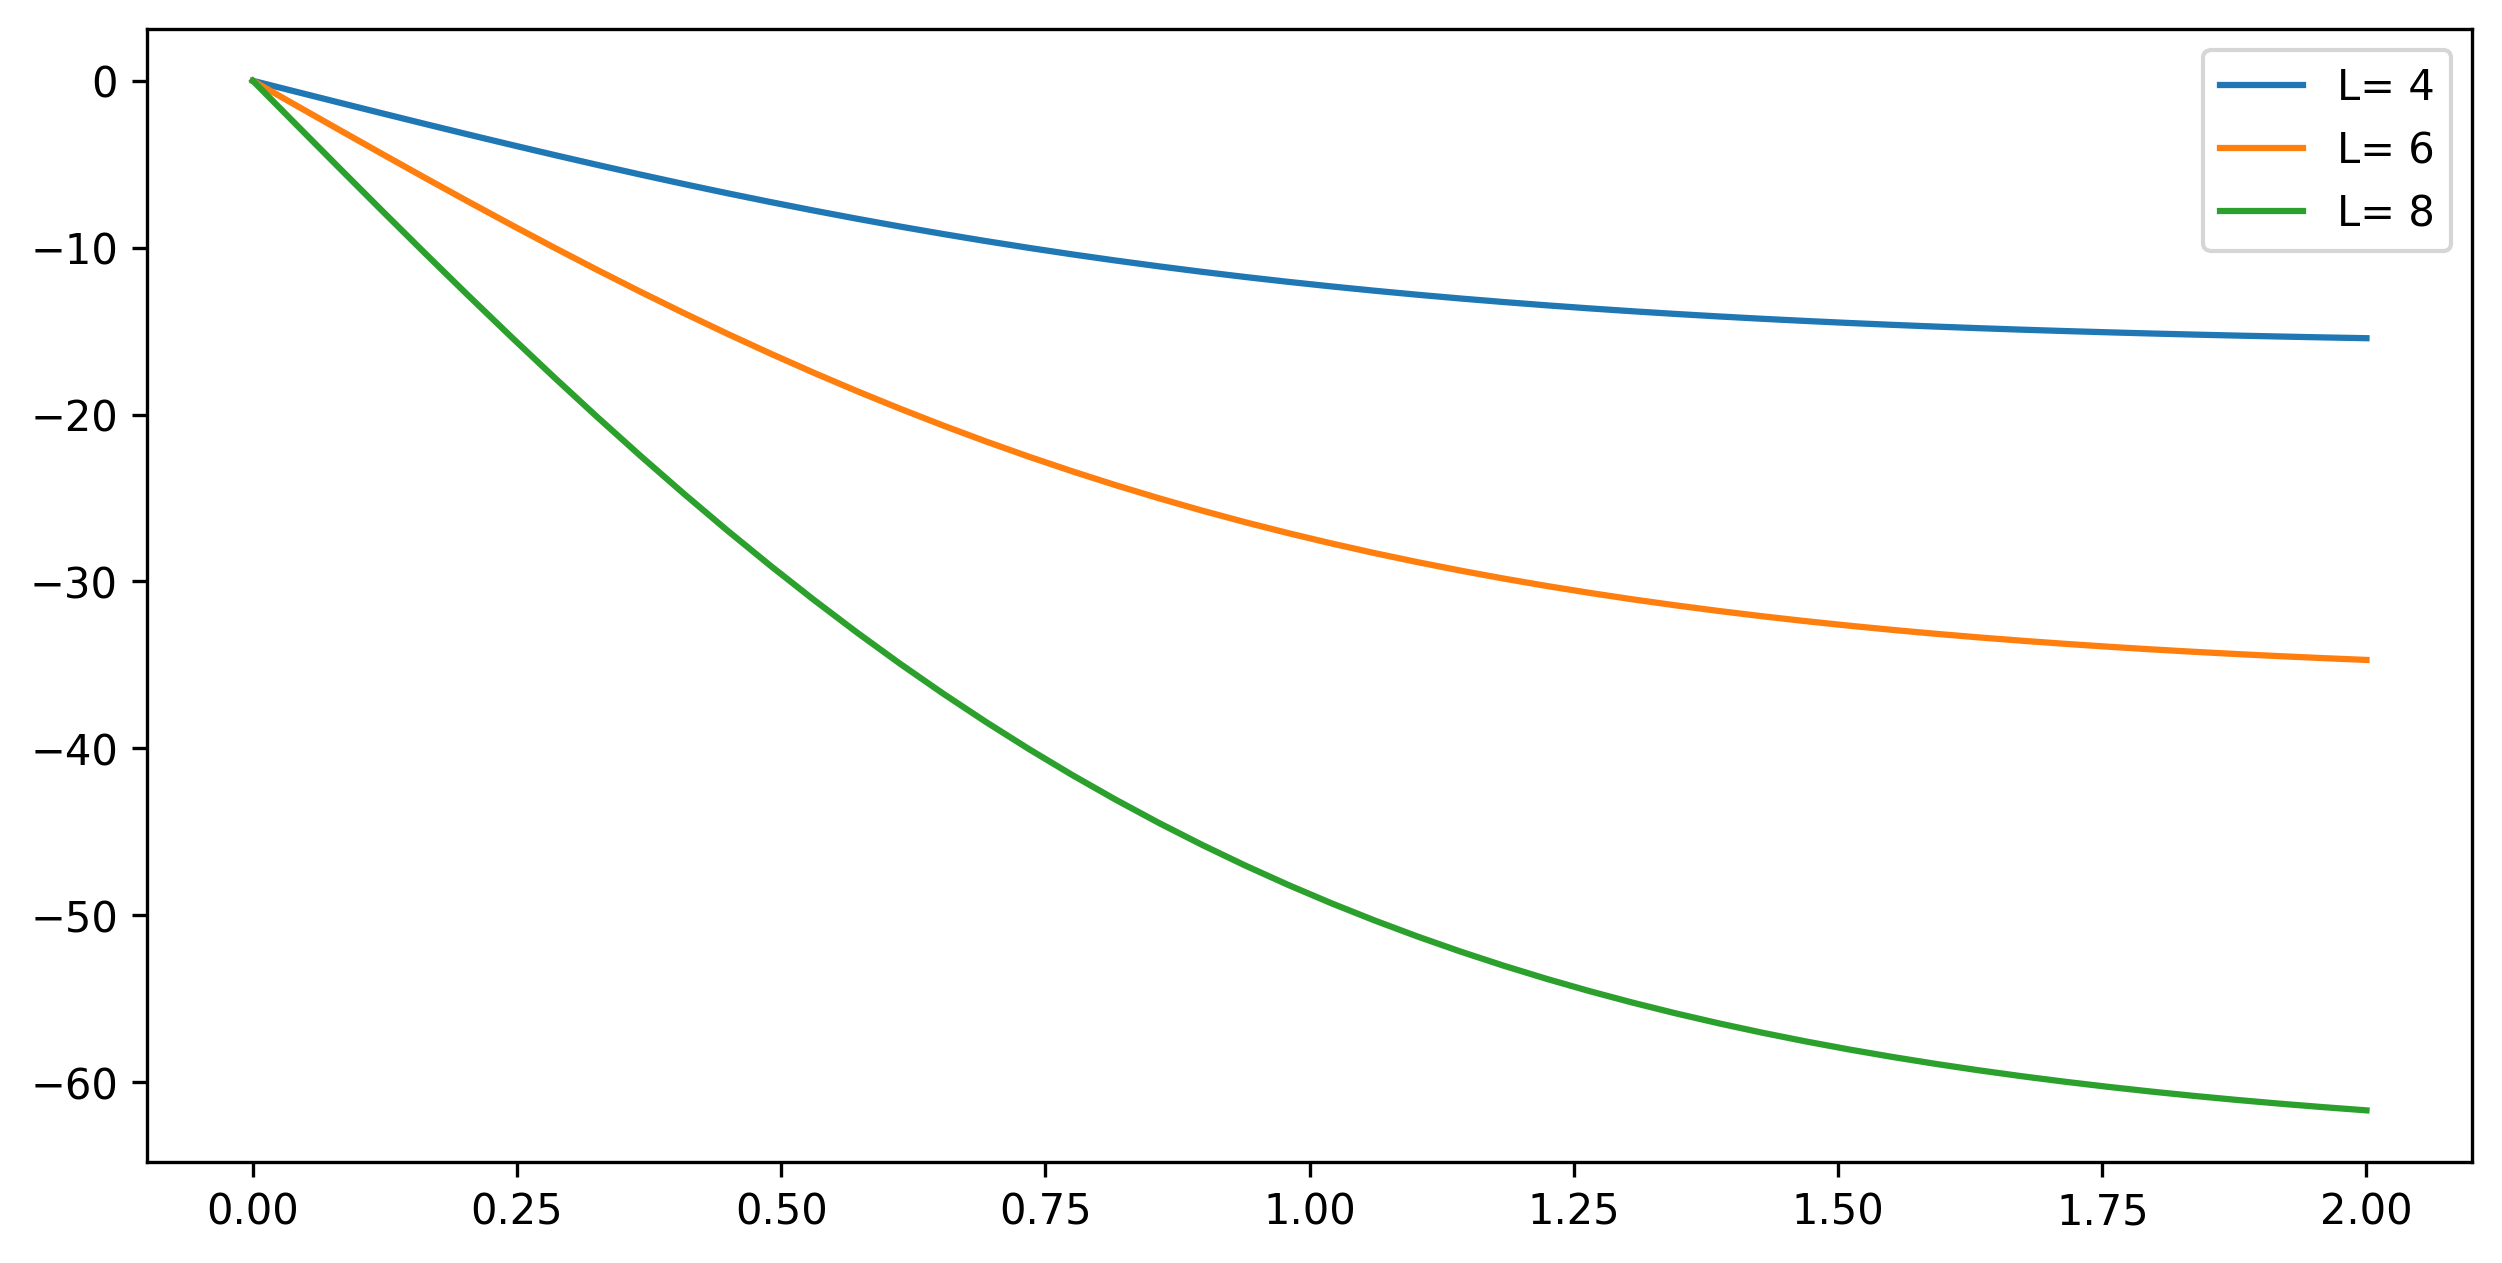

In [14]:
def H1_med(beta,B,L):
    return -B*L**2*np.tanh(beta*B)
betas = np.linspace(0,2,50)
Ls = [4,6,8]
plt.figure(figsize=(10,5), dpi=300)
for L in Ls:
    plt.plot(betas, H1_med(betas,1,L), label="L= {}".format(L))
plt.legend()
plt.show()

(b) $<\mathcal{V}>_{0}=4L^{2}\tanh^{2}\!\left(\beta\mu B\right)$;

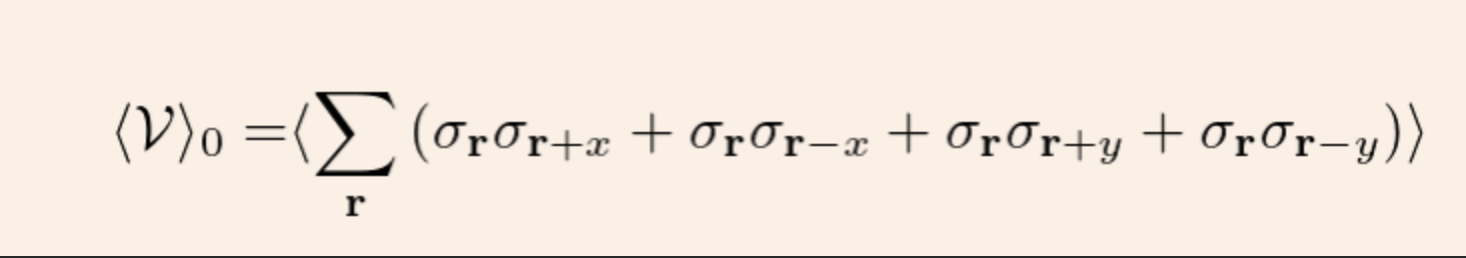

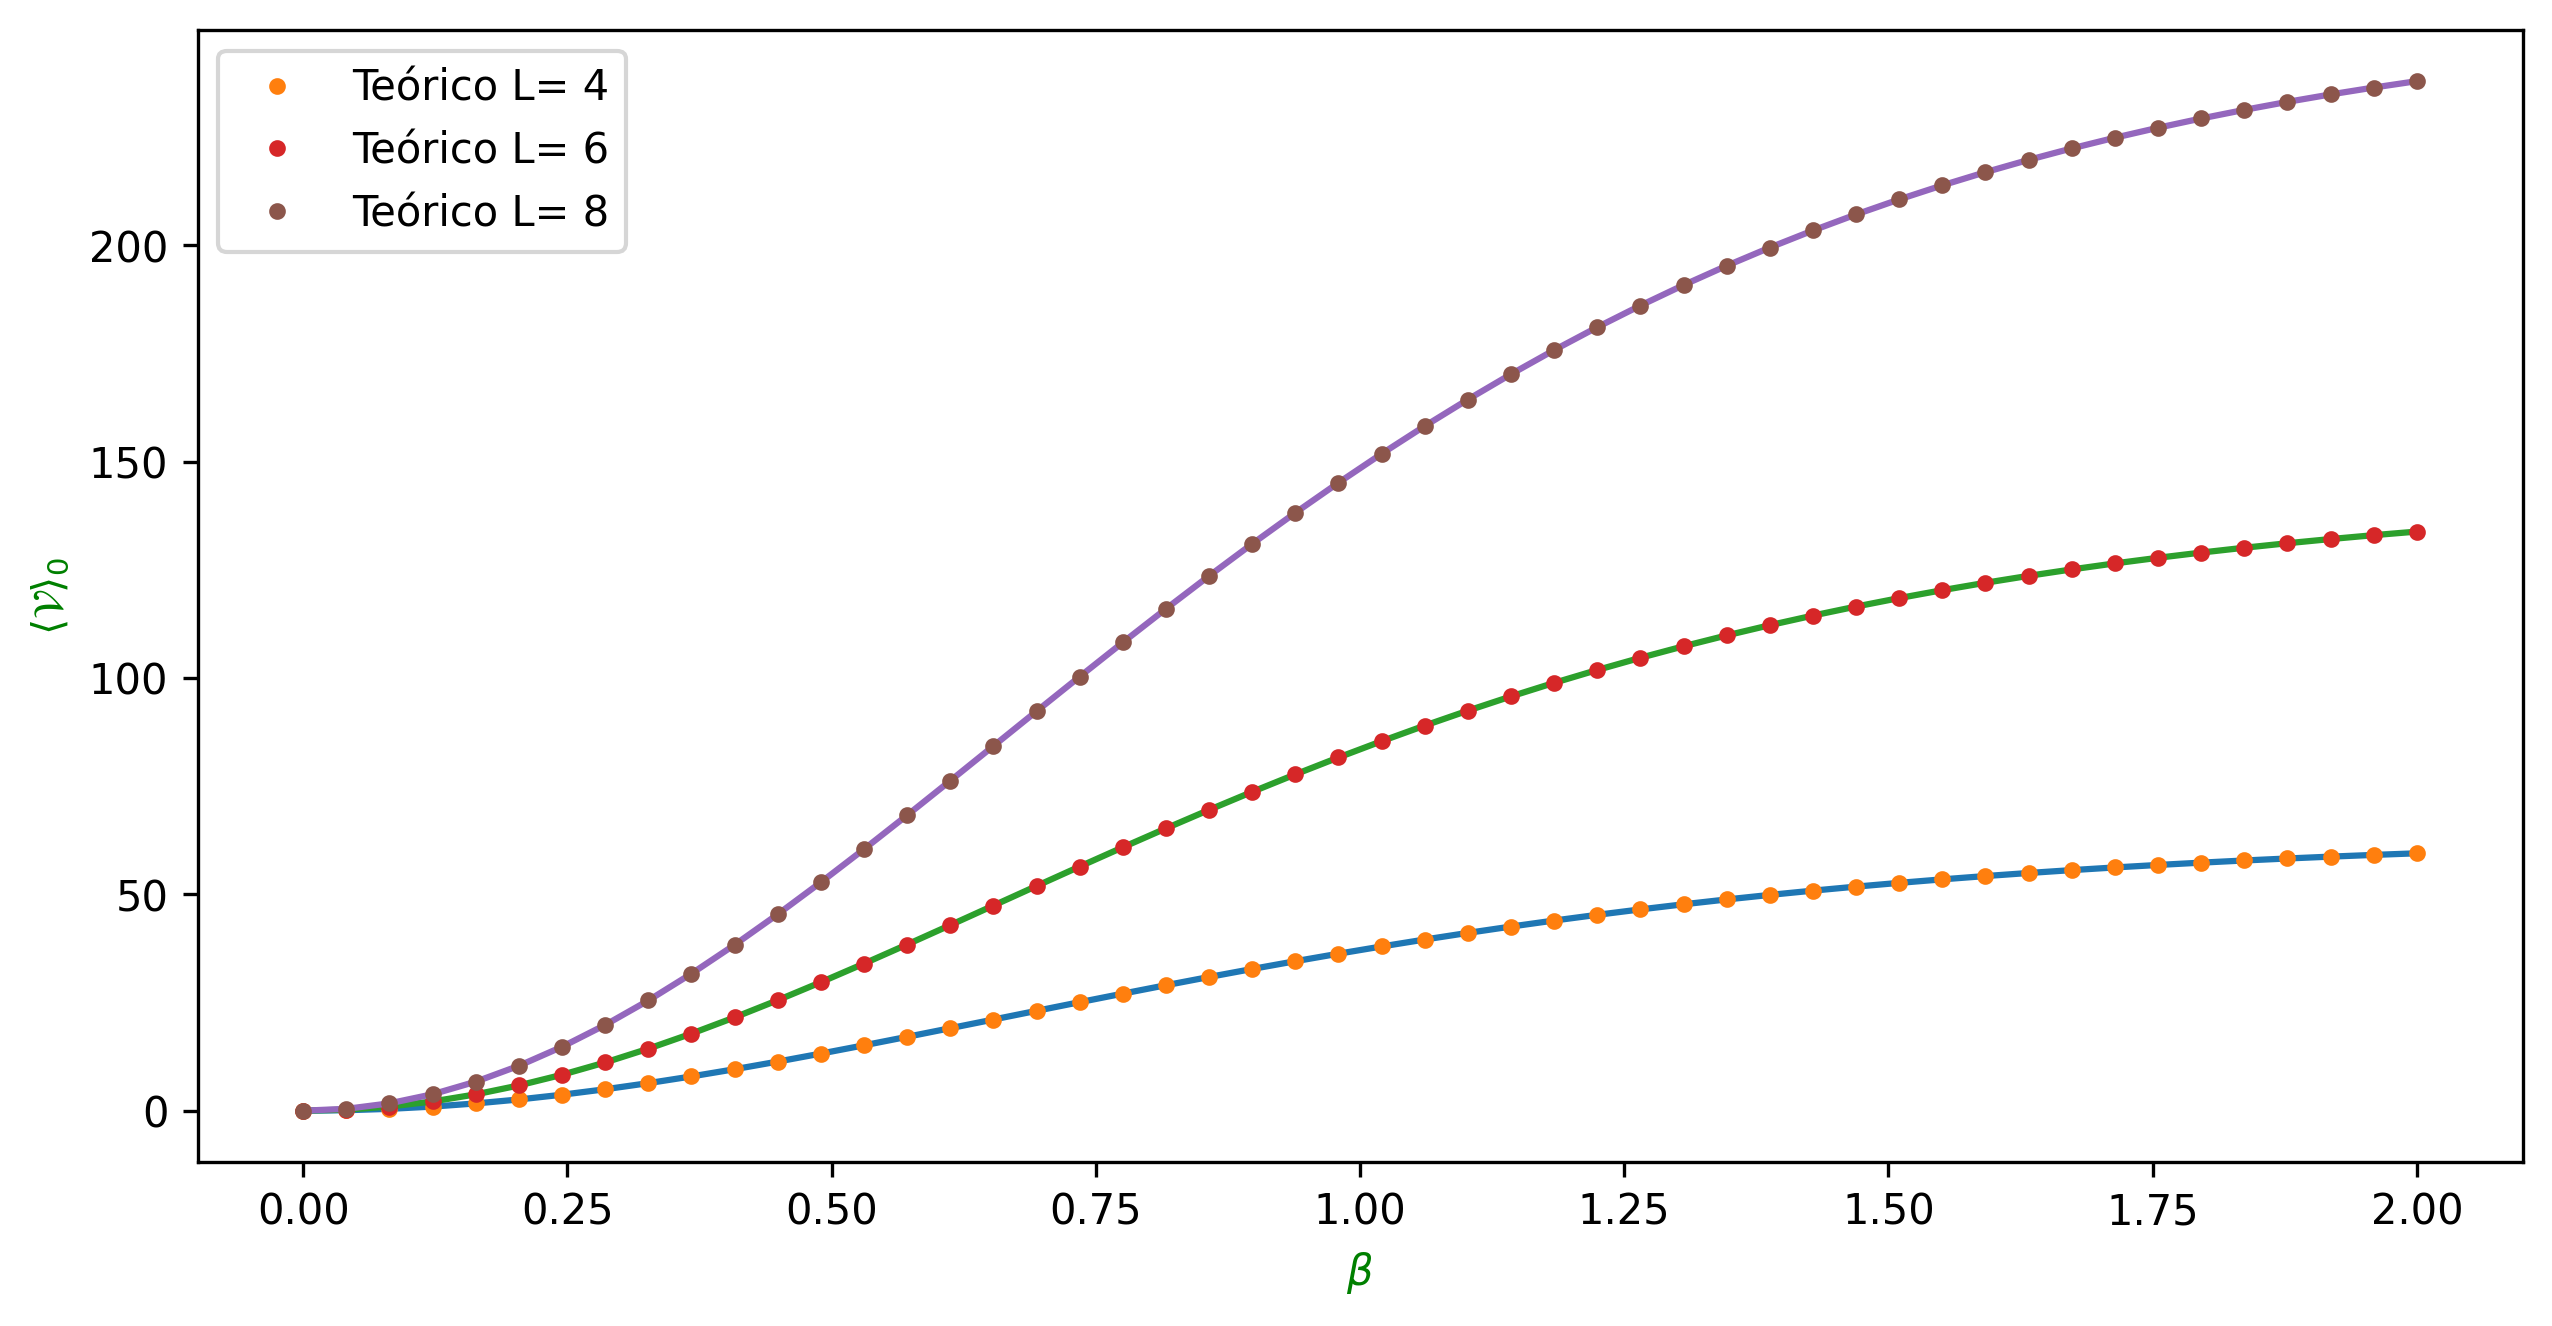

In [15]:
def med_V0(L,beta,B):
    soma = 0
    for i in range(L):
        for j in range(L):
            r1 = np.array([i,j])
            ryp = np.array([i,(j+1)%L])
            rym = np.array([i,(j-1)%L])
            rxp = np.array([(i+1)%L,j])
            rxm = np.array([(i-1)%L,j])
            #cálculo das correlações entre 2 spins
            soma += inter_2(r1,rxp,beta,B)
            soma += inter_2(r1,rxm,beta,B)
            soma += inter_2(r1,ryp,beta,B)
            soma += inter_2(r1,rxm,beta,B)
    return soma

betas = np.linspace(0,2,50)
Ls = [4,6,8]
plt.figure(figsize=(10,5), dpi=300)

for L in Ls:
    plt.plot(betas, med_V0(L,betas,1))
    plt.plot(betas, 4*L**2*np.tanh(betas)**2,".",label="Teórico L= {}".format(L))
plt.legend()
plt.xlabel(r"$\beta$", color="green");plt.ylabel(r"$\langle \mathcal{V} \rangle_0$", color="green")
plt.show()

        
    
        

(c) $<\mathcal{V}\mathcal{H}_{1}\!\!>_{0}-<\mathcal{V}>_{0}<\mathcal{H}_{1}\!\!>_{0}=-8\mu BL^{2}\left[\tanh\!\left(\beta\mu B\right)-\tanh^{3}\!\left(\beta\mu B\right)\right]$;

Das alíneas anteriores já confirmamos o resultado de $\langle \mathcal{V} \rangle_0$ e  $\langle \mathcal{H}_1 \rangle_0$, logo:
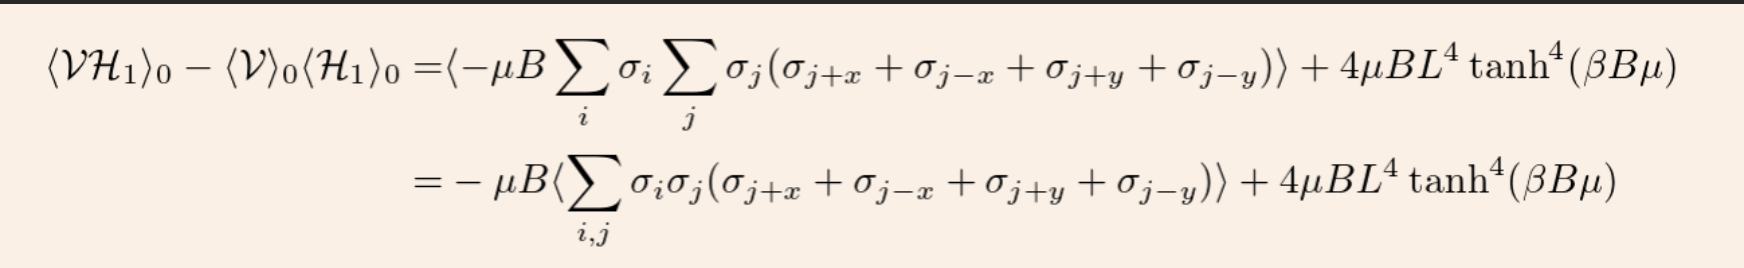

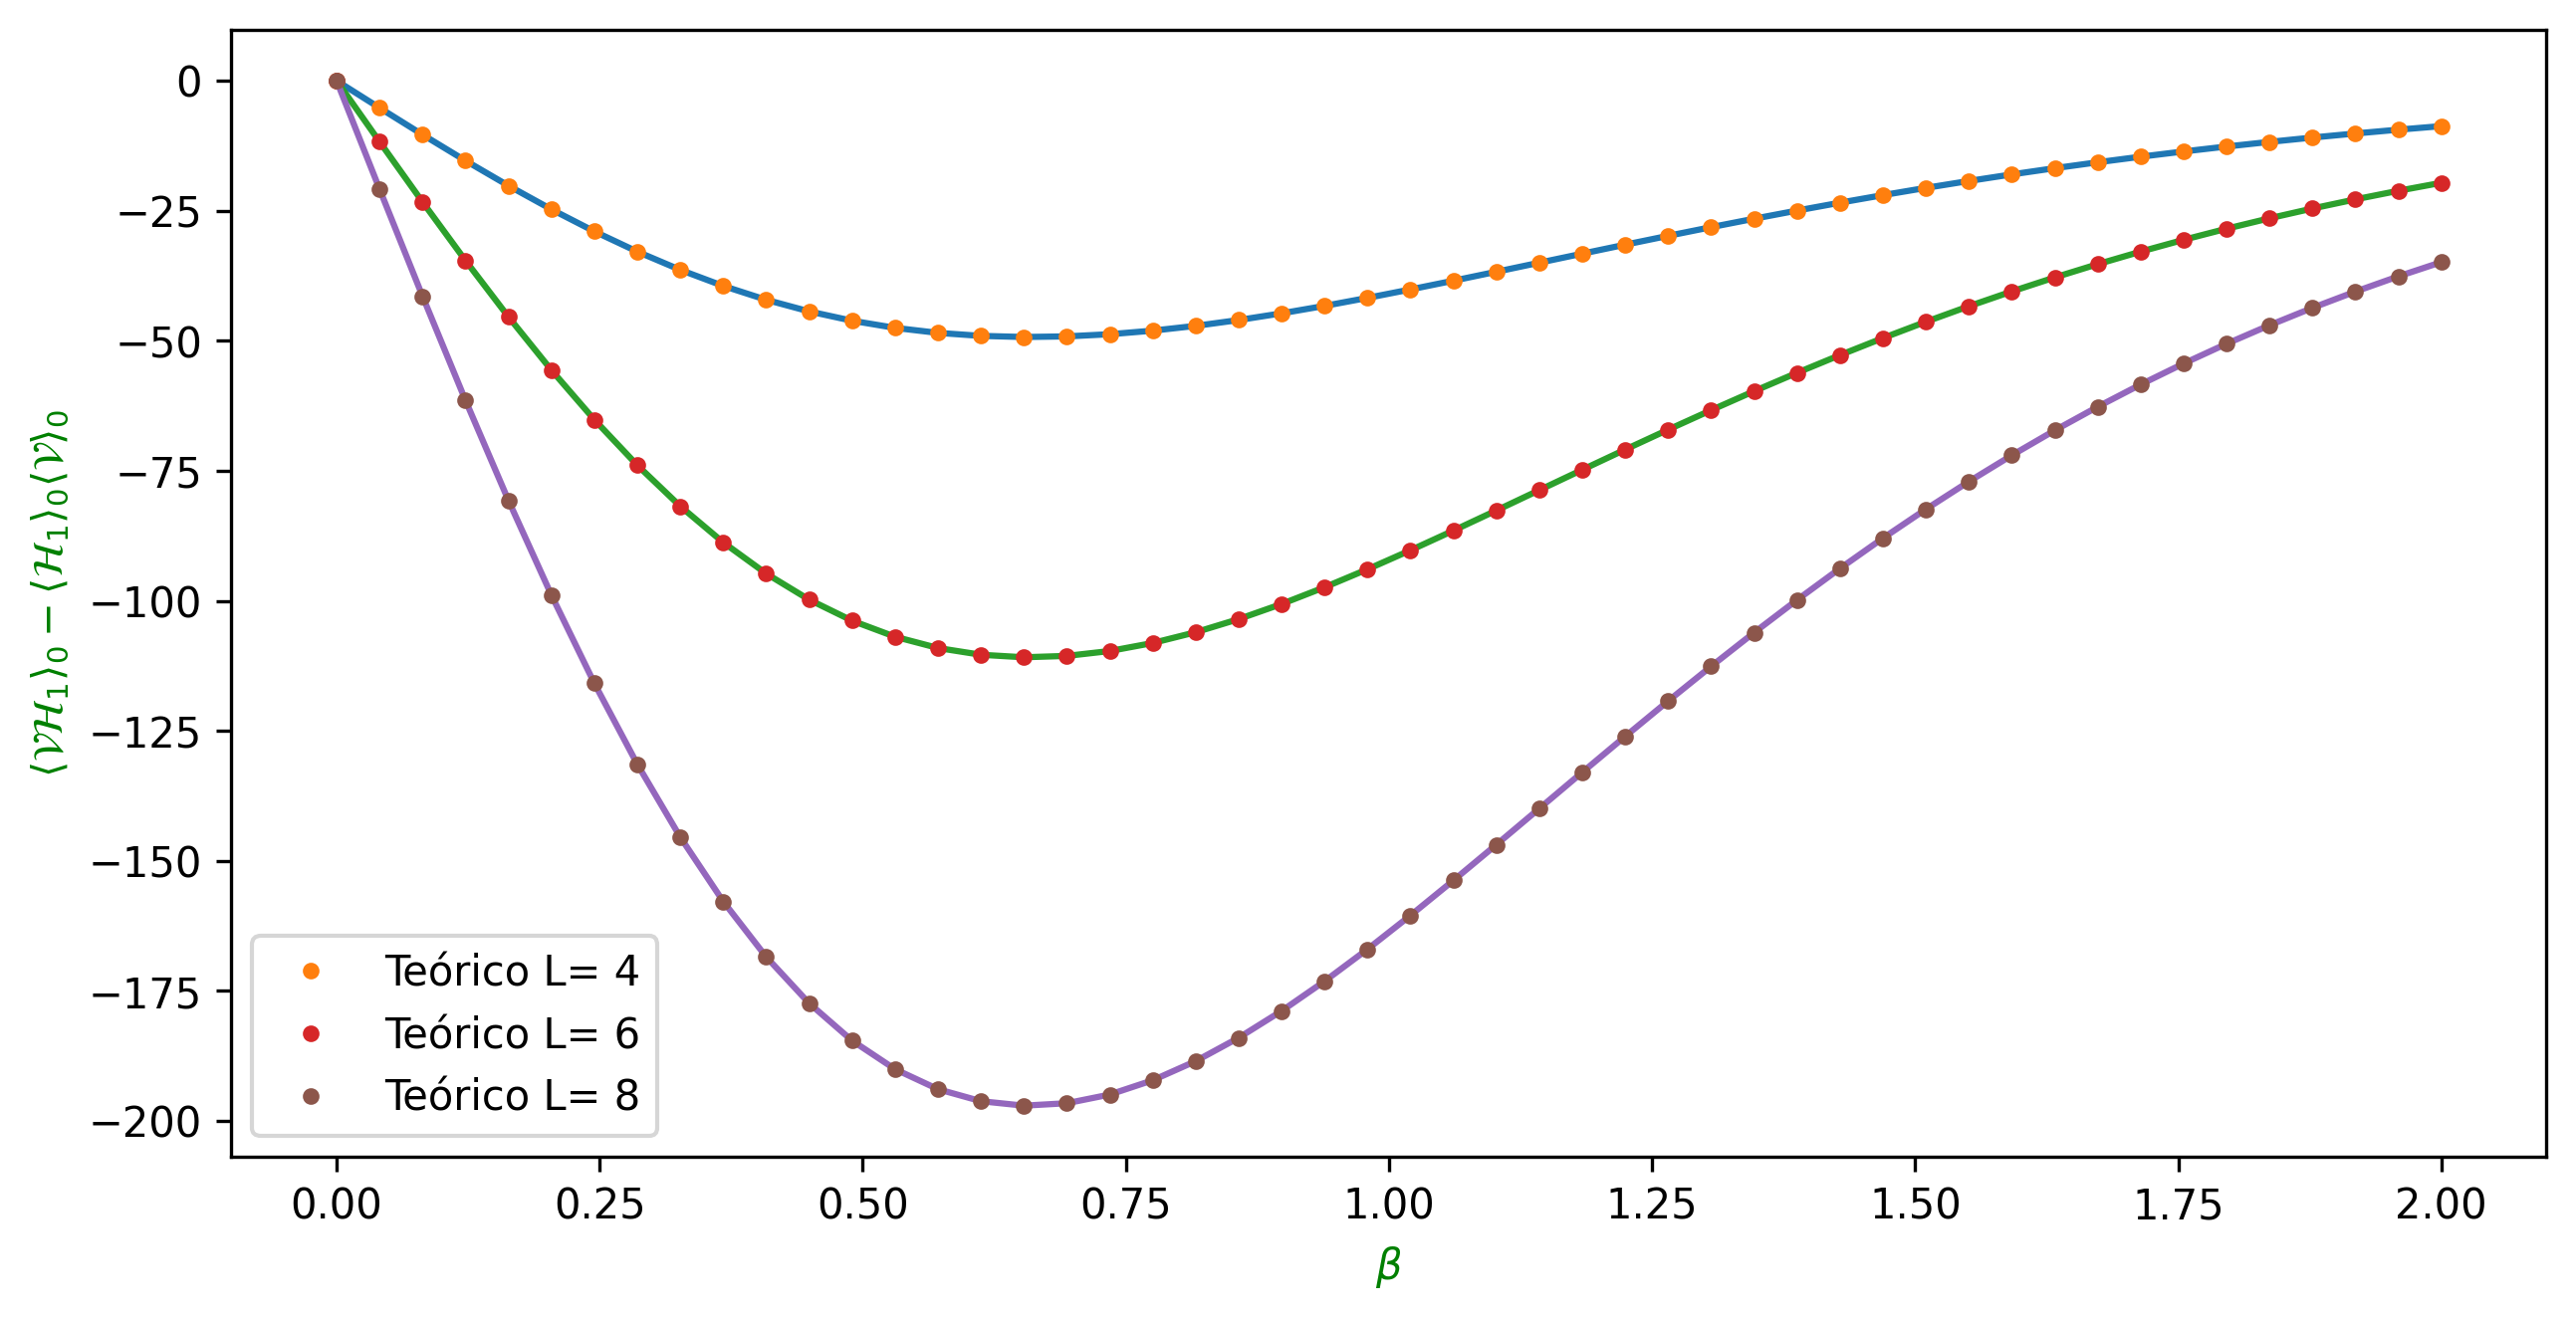

In [16]:
def med_vh1_vh(L,beta,B):
    soma = 0
    for i in range(L):
        for j in range(L):
            r1 = np.array([i,j])
            ryp = np.array([i,(j+1)%L])
            rym = np.array([i,(j-1)%L])
            rxp = np.array([(i+1)%L,j])
            rxm = np.array([(i-1)%L,j])
            for k in range(L):
                for m in range(L):
                    r2 = np.array([k,m])
                    soma += inter_3(r1,r2,ryp,beta,B)
                    soma += inter_3(r1,r2,rym,beta,B)
                    soma += inter_3(r1,r2,rxp,beta,B)
                    soma += inter_3(r1,r2,rxm,beta,B)
    return -B*soma + 4*B*L**4*np.tanh(beta*B)**3

def teorico(L,beta,B):
    tanh = np.tanh(beta*B)
    return -8*B*L**2 * (tanh - tanh**3)

betas = np.linspace(0,2,50)
Ls = [4,6,8]
plt.figure(figsize=(10,5), dpi=300)

for L in Ls:
    plt.plot(betas, med_vh1_vh(L,betas,1))
    plt.plot(betas,teorico(L,betas,1),".",label="Teórico L= {}".format(L))
plt.xlabel(r"$\beta$", color="green");plt.ylabel(r"$\langle \mathcal{VH}_1 \rangle_0 - \langle \mathcal{H}_1 \rangle_0\langle \mathcal{V} \rangle_0$", color="green")
plt.legend()
plt.show()



(d) $<\mathcal{V}^{2}\!\!>_{0}-<\mathcal{V}\!>_{0}^{2}=8L^{2}\left(1+3\tanh^{2}\!\left(\beta\mu B\right)-4\tanh^{4}\!\left(\beta\mu B\right)\right)$.

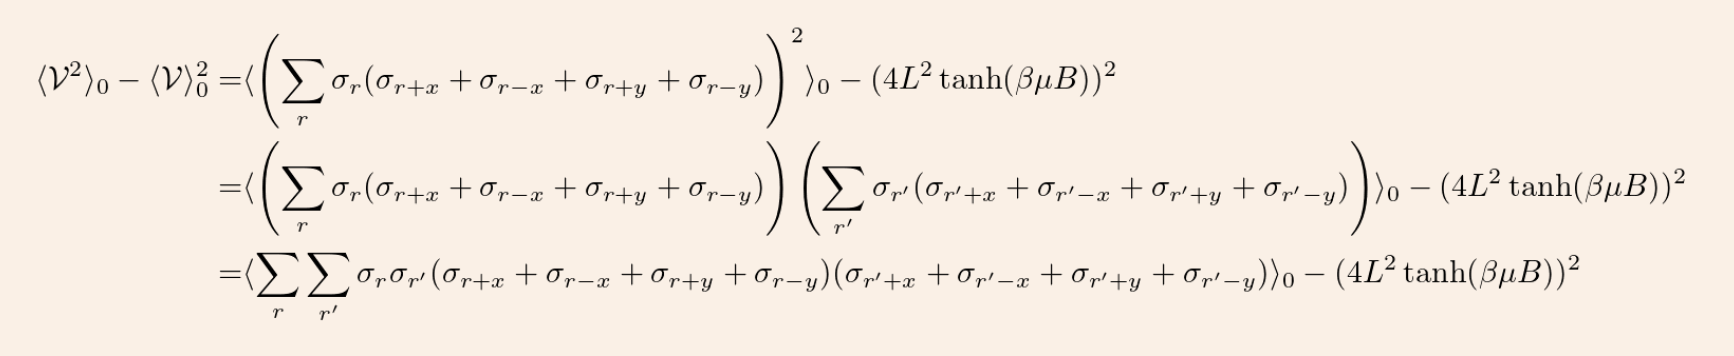

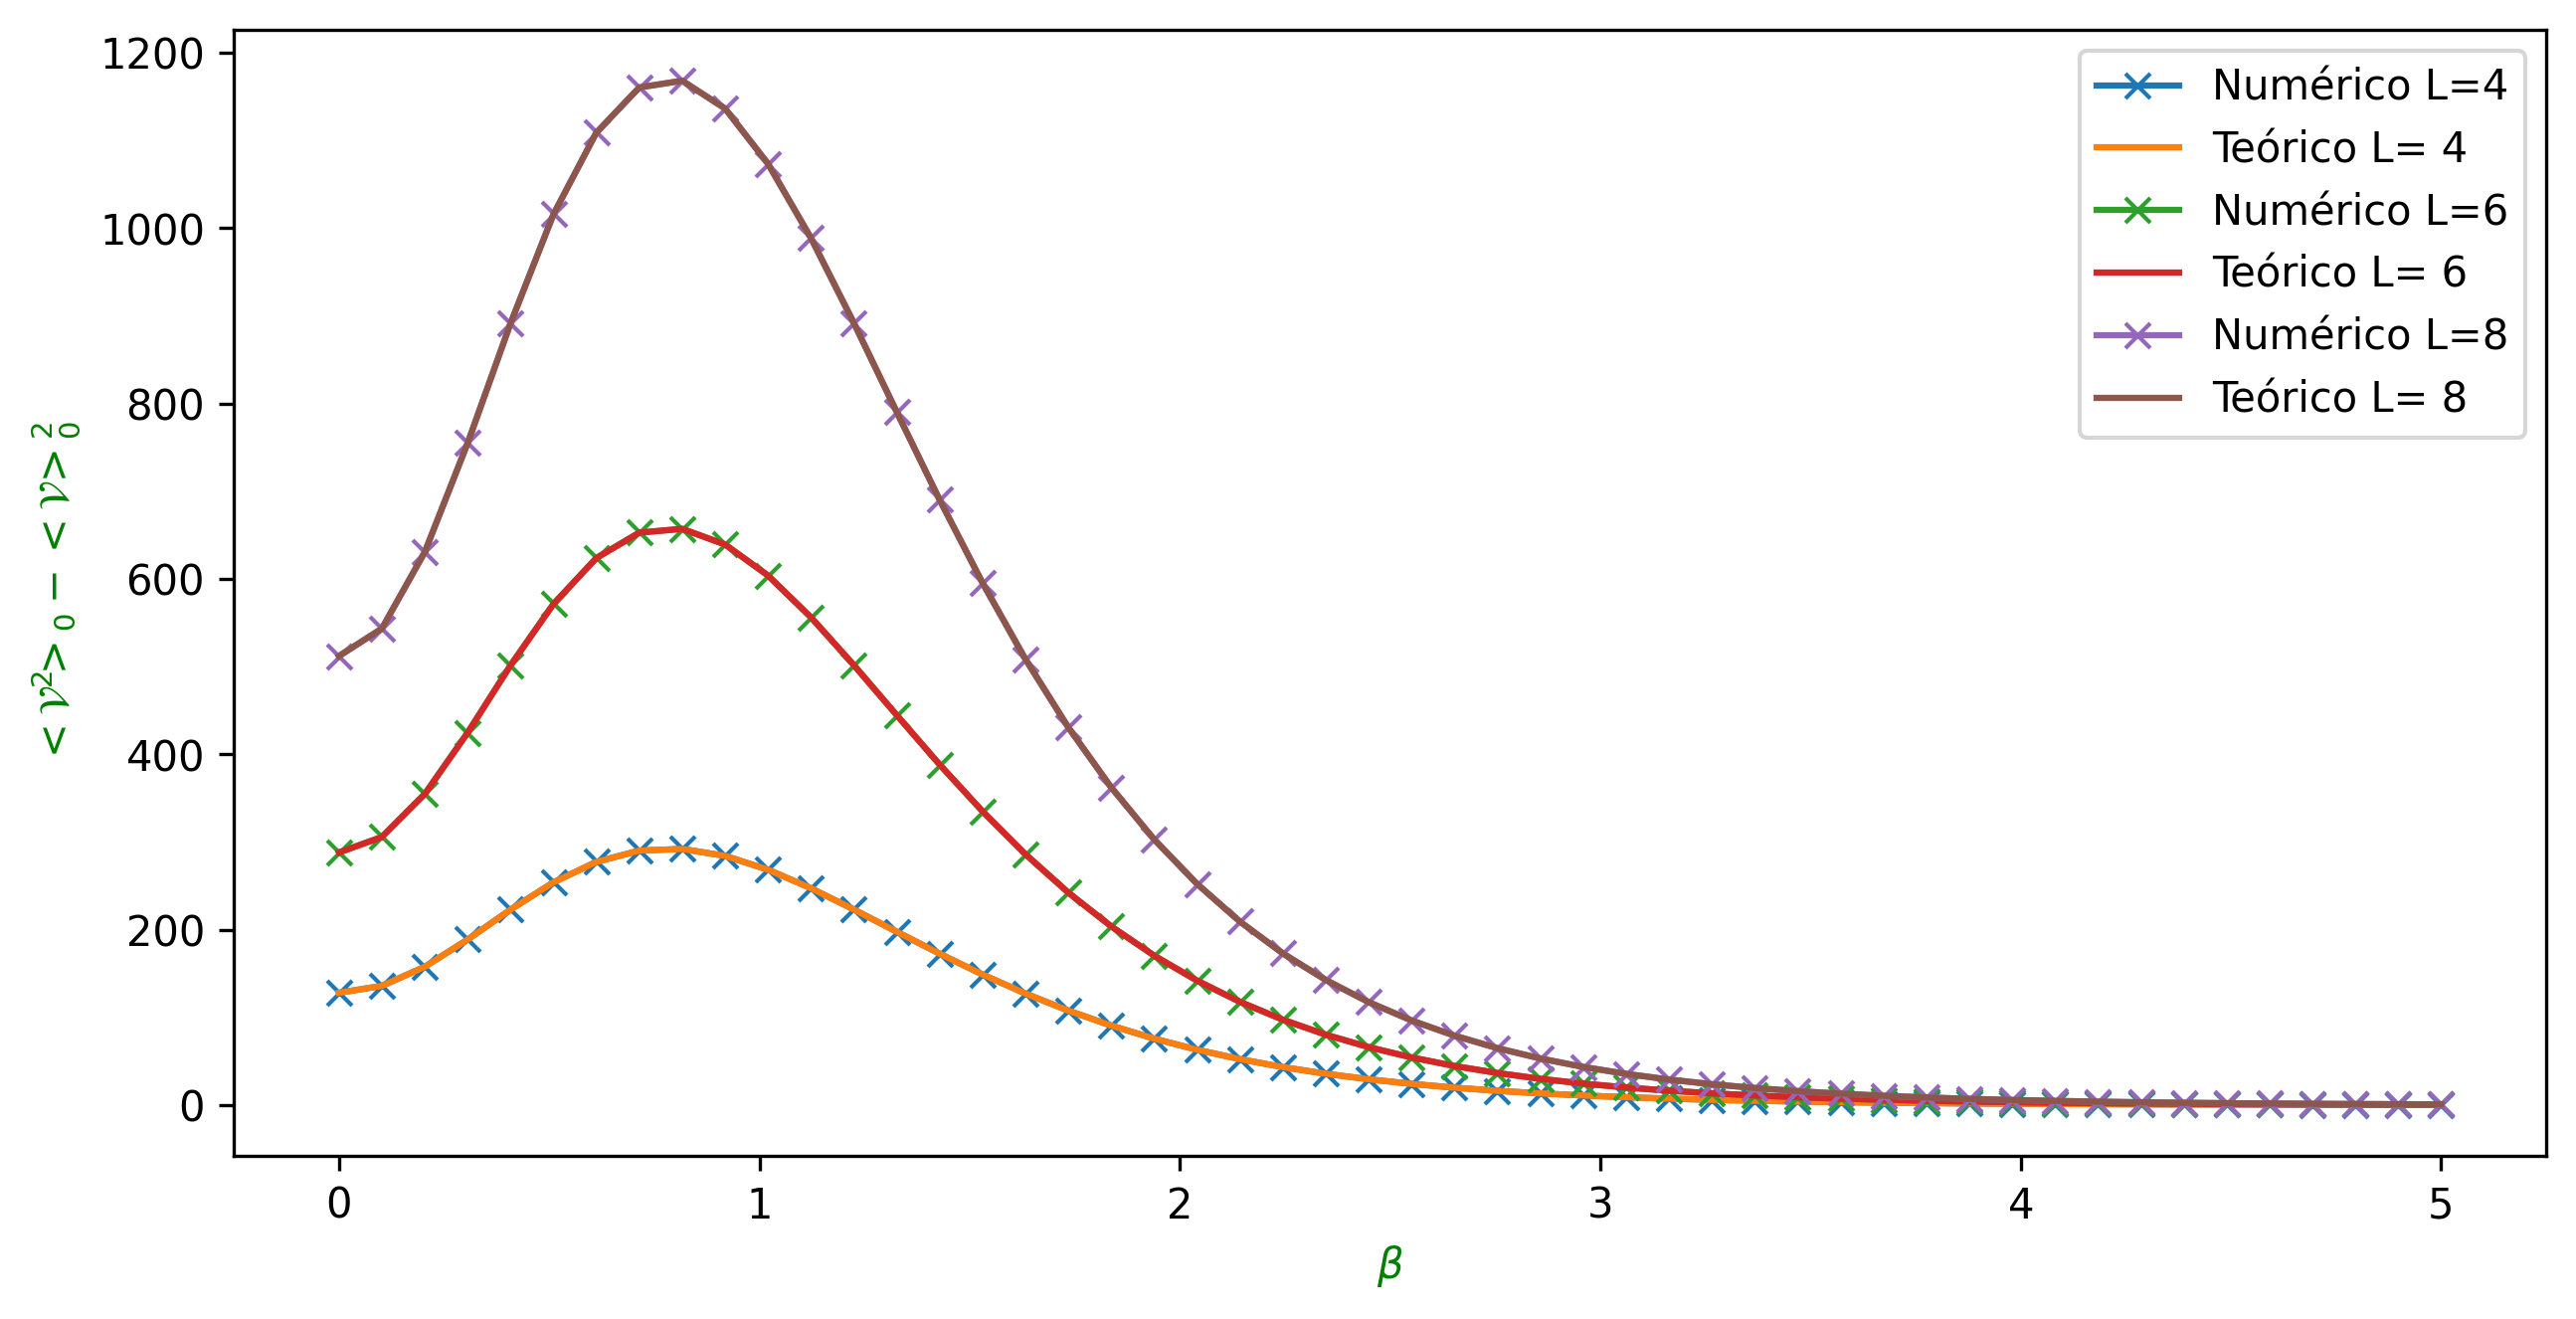

In [17]:
def var_v(L,beta,B):
    soma = 0
    for i in range(L):
        for j in range(L):
            r1 = np.array([i,j])
            
            ryp = np.array([i,(j+1)%L])
            rym = np.array([i,(j-1)%L])
            rxp = np.array([(i+1)%L,j])
            rxm = np.array([(i-1)%L,j])
            
            for k in range(L):
                for m in range(L):
                    r2 = np.array([k,m])
                    
                    ryyp = np.array([k,(m+1)%L])
                    ryym = np.array([k,(m-1)%L])
                    rxxp = np.array([(k+1)%L,m])
                    rxxm = np.array([(k-1)%L,m])
                    
                    soma += inter_4(r1,r2,ryp,ryyp,beta,B,L)
                    soma += inter_4(r1,r2,ryp,ryym,beta,B,L)
                    soma += inter_4(r1,r2,ryp,rxxp,beta,B,L)
                    soma += inter_4(r1,r2,ryp,rxxm,beta,B,L)
                    
                    soma += inter_4(r1,r2,rym,ryyp,beta,B,L)
                    soma += inter_4(r1,r2,rym,ryym,beta,B,L)
                    soma += inter_4(r1,r2,rym,rxxp,beta,B,L)
                    soma += inter_4(r1,r2,rym,rxxm,beta,B,L)
                    
                    soma += inter_4(r1,r2,rxm,ryyp,beta,B,L)
                    soma += inter_4(r1,r2,rxm,ryym,beta,B,L)
                    soma += inter_4(r1,r2,rxm,rxxp,beta,B,L)
                    soma += inter_4(r1,r2,rxm,rxxm,beta,B,L)
                    
                    soma += inter_4(r1,r2,rxp,ryyp,beta,B,L)
                    soma += inter_4(r1,r2,rxp,ryym,beta,B,L)
                    soma += inter_4(r1,r2,rxp,rxxp,beta,B,L)
                    soma += inter_4(r1,r2,rxp,rxxm,beta,B,L)
                    
    return soma - (4*L**2 * np.tanh(beta*B)**2)**2


def teorico_varV(L,beta,B):
    tanh = np.tanh(beta*B)
    return 8*L**2 * (1 + 6*tanh**2 - 7*tanh**4)

betas = np.linspace(0,5,50)
Ls = [4,6,8]
plt.figure(figsize=(10,5), dpi=300)

for L in Ls:
    plt.plot(betas, var_v(L,betas,1),"x-", label="Numérico L={}".format(L))
    plt.plot(betas, teorico_varV(L,betas,1), label="Teórico L= {}".format(L))
plt.xlabel(r"$\beta$", color="green");plt.ylabel(r"$<\mathcal{V}^{2}\!\!>_{0}-<\mathcal{V}\!>_{0}^{2}$", color="green")
plt.legend()
plt.show()

2. Utilizando as expressões obtidas na alínea anterior obtenha que a magnetização do sistema interactuante como função de $(T,B)$ é dada pela seguinte expressão:
$$
m(T,B)\!=\!\mu\tanh\!\left(\beta\mu B\right)-\frac{4\mu J}{k_{B}T}\left[\tanh\!\left(\beta\mu B\right)-\tanh^{3}\!\left(\beta\mu B\right)\right].
$$
Represente $m$ como função de $T$ para vários valores de $B$ e compare o caso interatuante com o comportamento observado no paramagnete ideal. O que conclui?

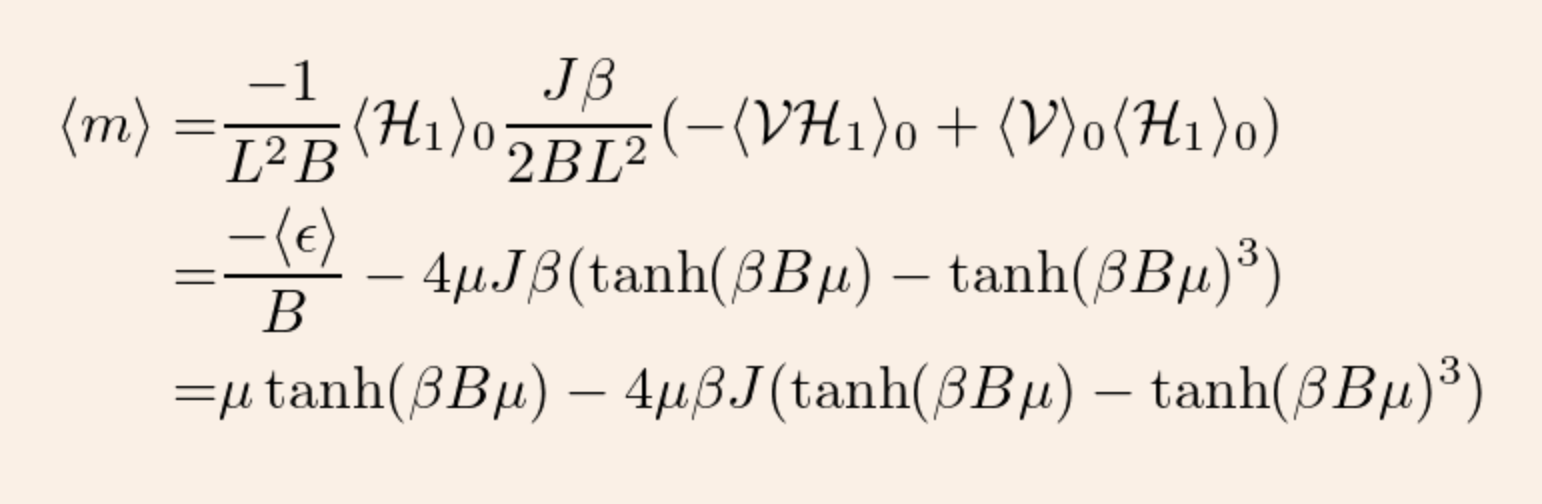

Observa-se que para altas temperaturas, ambos os casos são concordantes, para todos os valores de B. Contudo, verifica-se que os resultados divergem nos regimes de temperaturas baixas (exceto em B=0), visto que as aproximações feitas nas alíneas anteriores deixam de ser válidas. 


Esta divergência também parece ser mais notória para valores de B maiores. Uma possível interpretação é que com B forte, os spins tendem-se a alinhar com o campo. Mas esta mobilização de spins aumenta o termo de interação, dificultando o alinhamento com B.

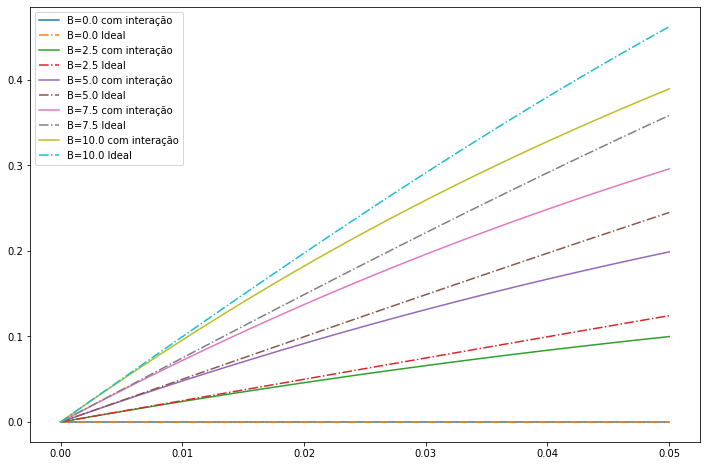

In [18]:
def m_media(beta,B,J):
    tanh = np.tanh(beta*B)
    return tanh - (4*beta*J)*(tanh - tanh**3)

def magnetizacao(beta,mu,B):
    return mu*np.tanh(beta*mu*B)

betas = np.linspace(0,0.05,100)
Bs = np.linspace(0,10,5)
plt.figure(figsize=(12,8))
for B in Bs:
    plt.plot(betas, m_media(betas,B,1), label="B={} com interação".format(B))
    plt.plot(betas, magnetizacao(betas,1,B),"-.", label="B={} Ideal".format(B))
plt.legend()
plt.show()

3. Repita a análise anterior, mas agora para a energia média do sistema. Obtenha a expressão
$$
\mathcal{U}(T,B)\!	=\!-\mu B\tanh\!\left(\beta\mu B\right)\left(1-\frac{2J}{\mu B}\tanh\!\left(\beta\mu B\right)-4\beta J\left[1-\tanh^{2}\!\left(\beta\mu B\right)\right]\right)-2\beta J^{2}\left[1+3\tanh^{2}\!\left(\beta\mu B\right)-4\tanh^{4}\!\left(\beta\mu B\right)\right],
$$    
represente gráficos e descreva o comportamento induzido pela interação.

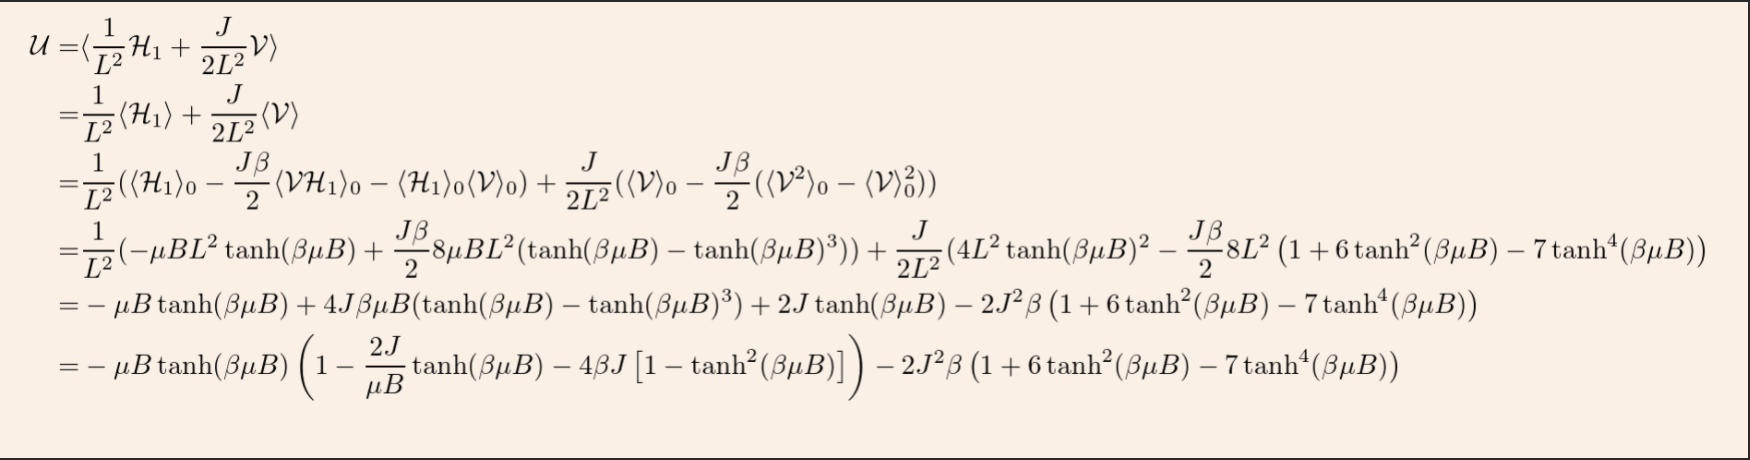

Representam-se gráfcos desta função para diferentes valores de J, que pode ser entendido como um parâmetro de interação. À medida que J aumenta, o estado em que os spins estão antiparalelos fica energeticamente mais favorável. Mas neste estado, a magnetização será mais pequena, e portanto o termo $\mathcal{H}_1$ será menor do que o termo de interação. Desta feita, a energia total será menor do que no caso ideal, e o desvio será tanto maior quanto maior for J.

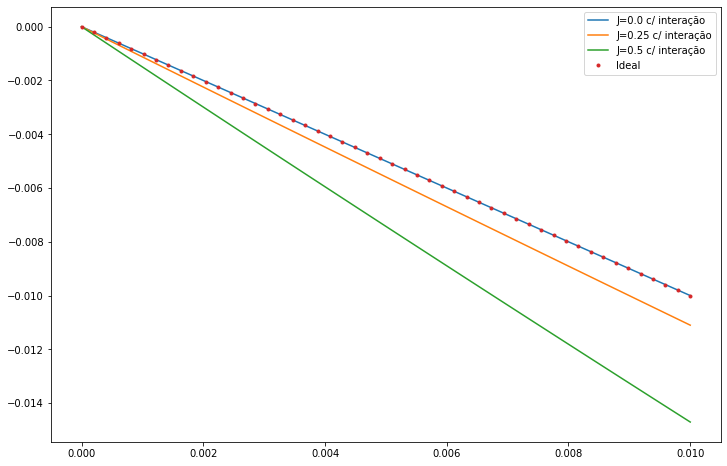

In [19]:
def u_med(beta,B,J):
    tanh = np.tanh(beta*B)
    termo1 = 2*J*tanh/B
    termo2 = 4*beta*J*(1-tanh**2)
    termo3 = 2*beta*J**2*(1+ 6*tanh**2 - 7*tanh**4)
    return -B*tanh*(1-termo1-termo2)-termo3

def epsilon(beta,mu,B):
    return -mu*B*np.tanh(beta*mu*B)

betas = np.linspace(0,0.01,50)
Js = np.linspace(0,0.5,3)
plt.figure(figsize=(12,8))
for J in Js:
    if B!=0:
        plt.plot(betas, u_med(betas,1,J), label="J={} c/ interação".format(J))
plt.plot(betas, epsilon(betas,1,1),".", label="Ideal")
plt.legend()
plt.show()

4. O método de Monte Carlo permite tratar este caso exactamente, mas para sistemas de tamanho finito. Modifique a função de Montecarlo que implementou anteriormente para incluir o Hamiltoniano com interacções (recebendo $J$ como argumento). [Sugestão: o termo de interacção incute uma grande penalização de performance no código por ter muitos termos para calcular de cada vez que um spin é alterado, pelo que poderá ser útil pensar sobre uma forma de evitar fazer tantas operações numéricas]

#Responda Aqui

In [20]:
def delta_E(L,rede, pos, B, beta, J, mu=1):
    x,y = pos
    
    xp, xm = x+1, x-1
    yp, ym = y+1, y-1 
    #vamos buscar as posições vizinhas
    sxp, sxm = rede[xp%L,y], rede[xm%L,y]
    syp, sym = rede[x,yp%L], rede[x,ym%L]
    
    inter_term = 2*J*rede[x,y]*(sxp+sxm+syp+sym)  #termo de interação
    dE = 2*mu*B*rede[x,y] - inter_term  #delta de Energia
    return np.exp(-beta*dE), dE

def e_tot_corr(L,J,rede): #devolve a energia total da configuração inicial do termo de interação
    soma = 0
    for i in range(L):
        for j in range(L):
            soma += rede[i,j]*(rede[(i+1)%L,j]+rede[(i-1)%L,j]+rede[i,(j+1)%L]+rede[i,(j-1)%L])
    return (J/2)*soma

def spin_flip_metropolis_corr(L,N,B,beta,J,mu=1): #segue de perto o 1 metodo de Monte-Carlo implementado
    rede = rd.randint(2,size=L**2)*2-1
    rede = rede.reshape(L,L)

    magn = np.empty(N)
    en = np.empty(N)
    
    magn_in = np.sum(rede)
    en_in = -magn_in + e_tot_corr(L,J,rede)
    
    for step in range(N):
        pos = (rd.randint(L),rd.randint(L))
        prob, dE = delta_E(L,rede,pos,B,beta,J)
        if rd.random() < prob:
            rede[pos[0],pos[1]] *= -1
            magn_in += 2*mu*rede[pos[0],pos[1]]
            en_in += dE
        magn[step] =  magn_in
        en[step] =  en_in 
    return magn , en         
            
    
print(spin_flip_metropolis_corr(8,10,1,1,1))
    


    

(array([0., 0., 2., 0., 0., 0., 0., 0., 2., 2.]), array([ 8.,  8.,  2.,  0.,  0.,  0.,  0.,  0., -2., -2.]))


5. Para $10$ valores de $\beta$ entre $0.001$ e $0.15$, $J=0.4$, $B=1$ e $N\!=\!10^{5}$ passos de Monte Carlo, represente a magnetização média, energia média, susceptibilidade magnética e calor específico como função de $\beta$. 

#Responda Aqui

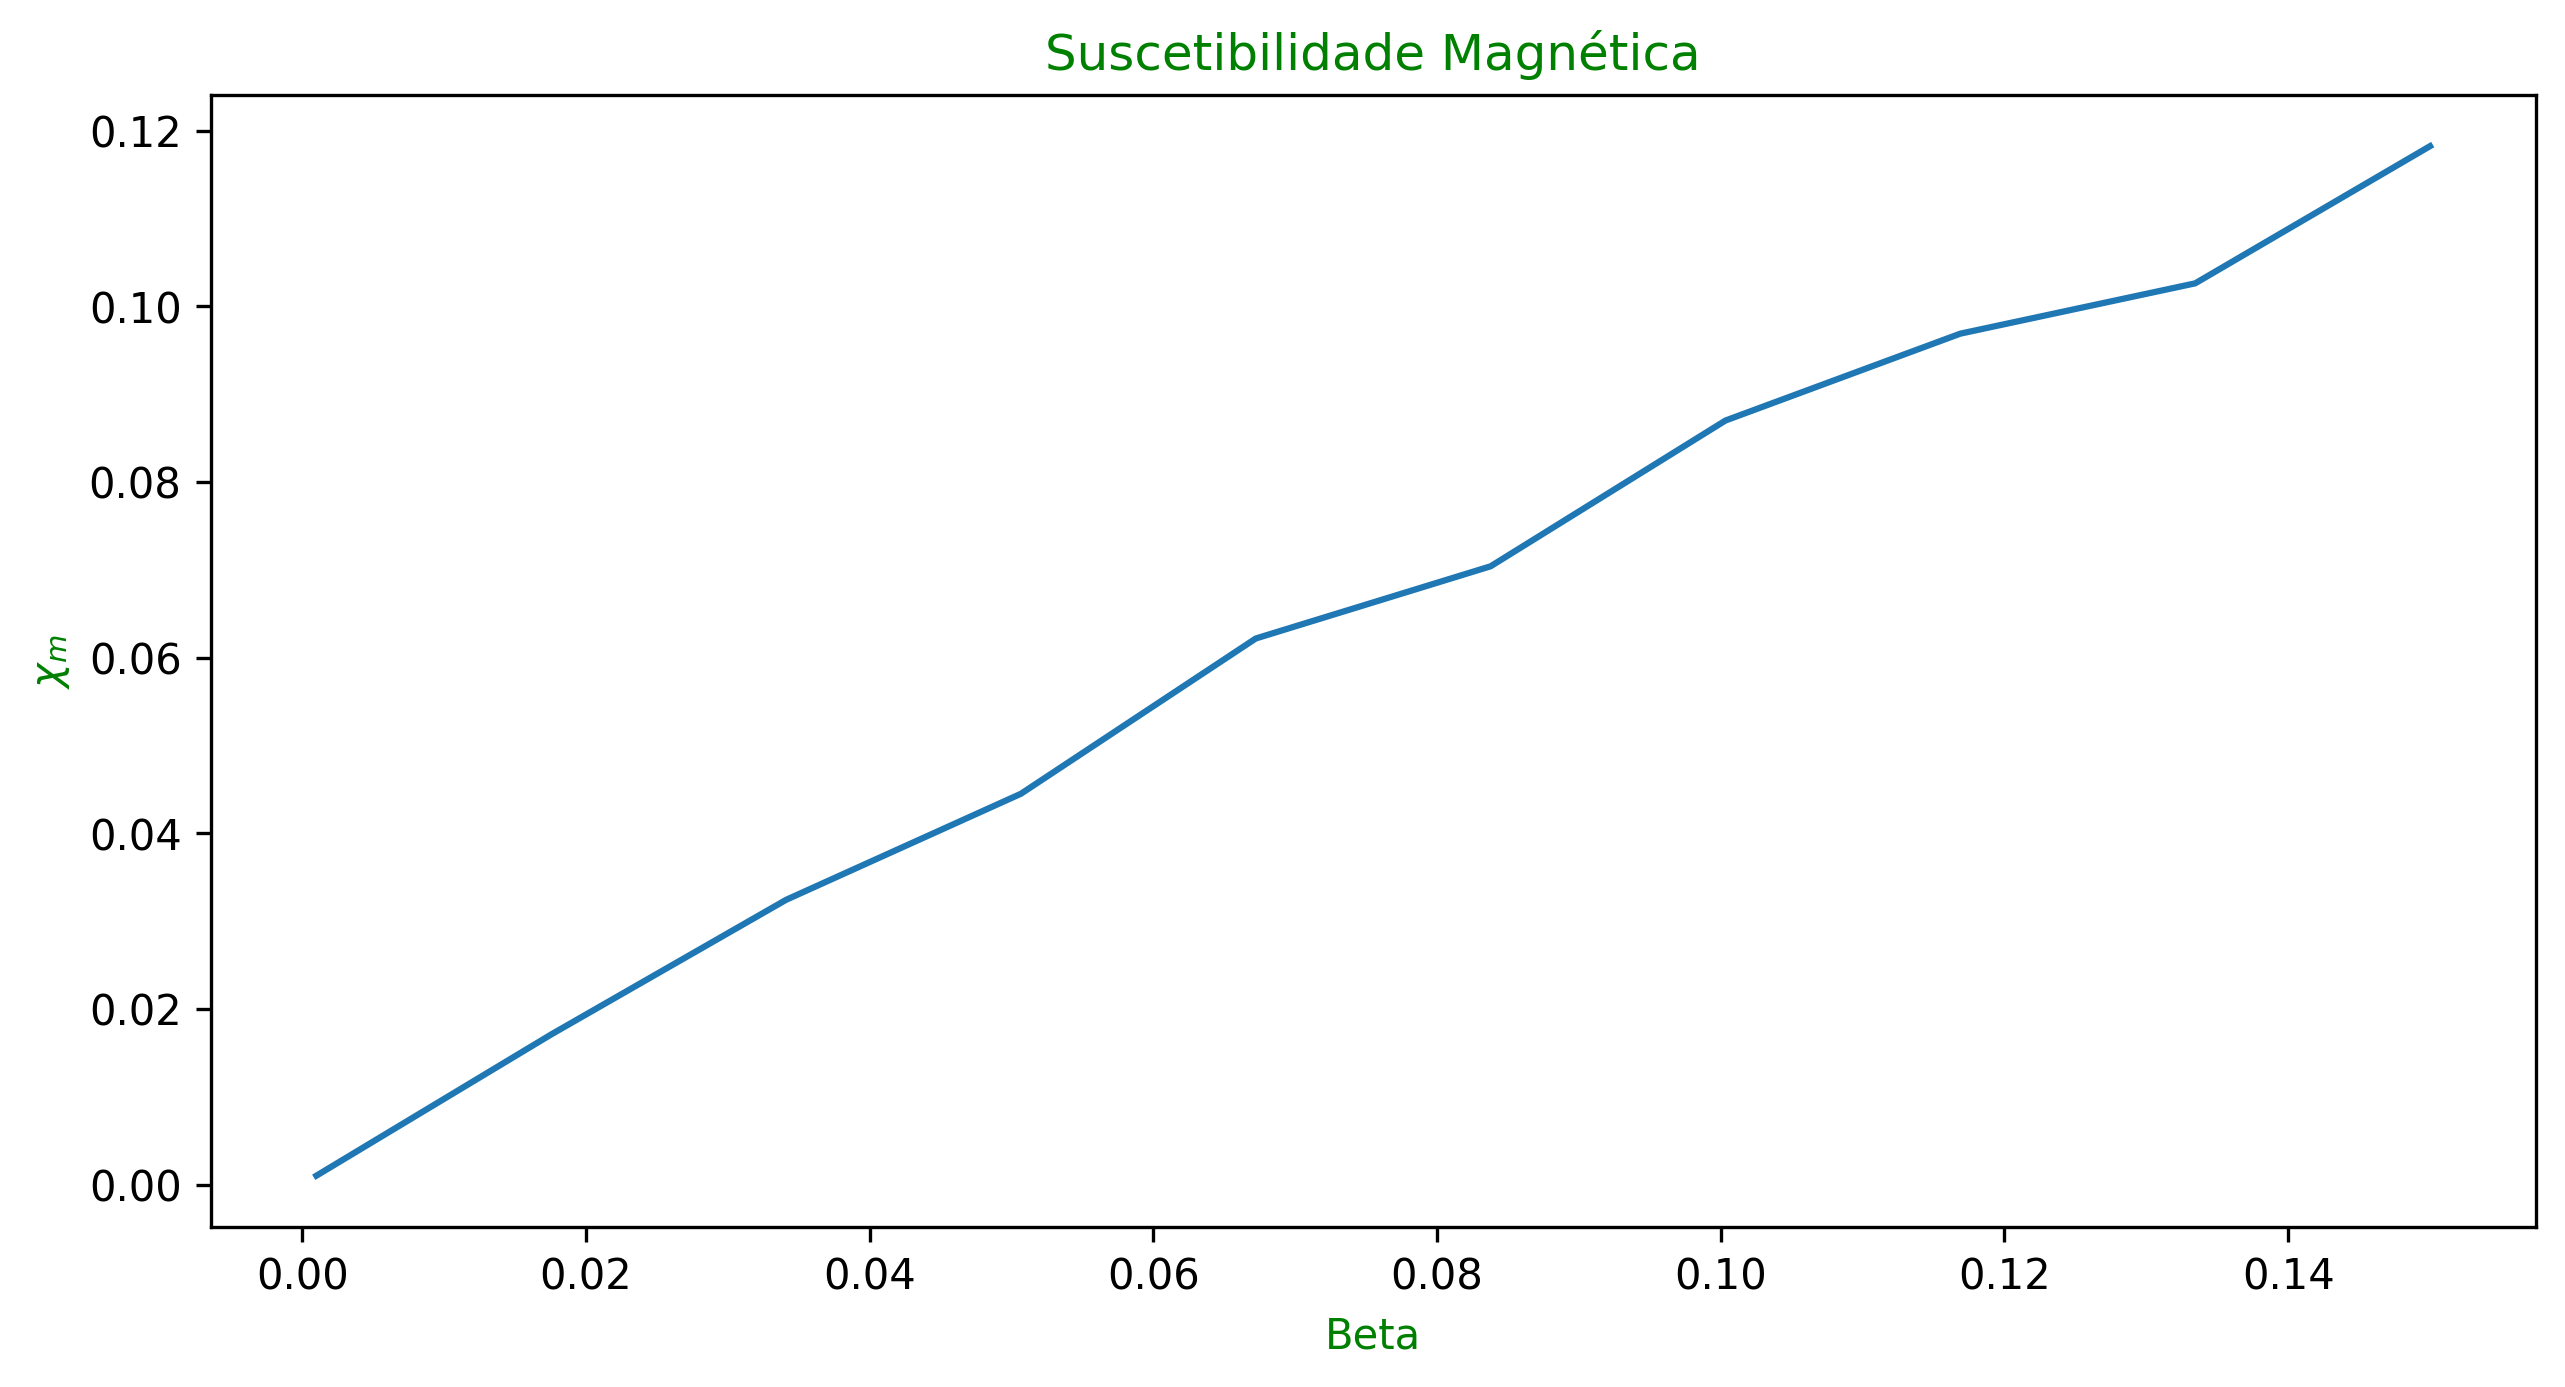

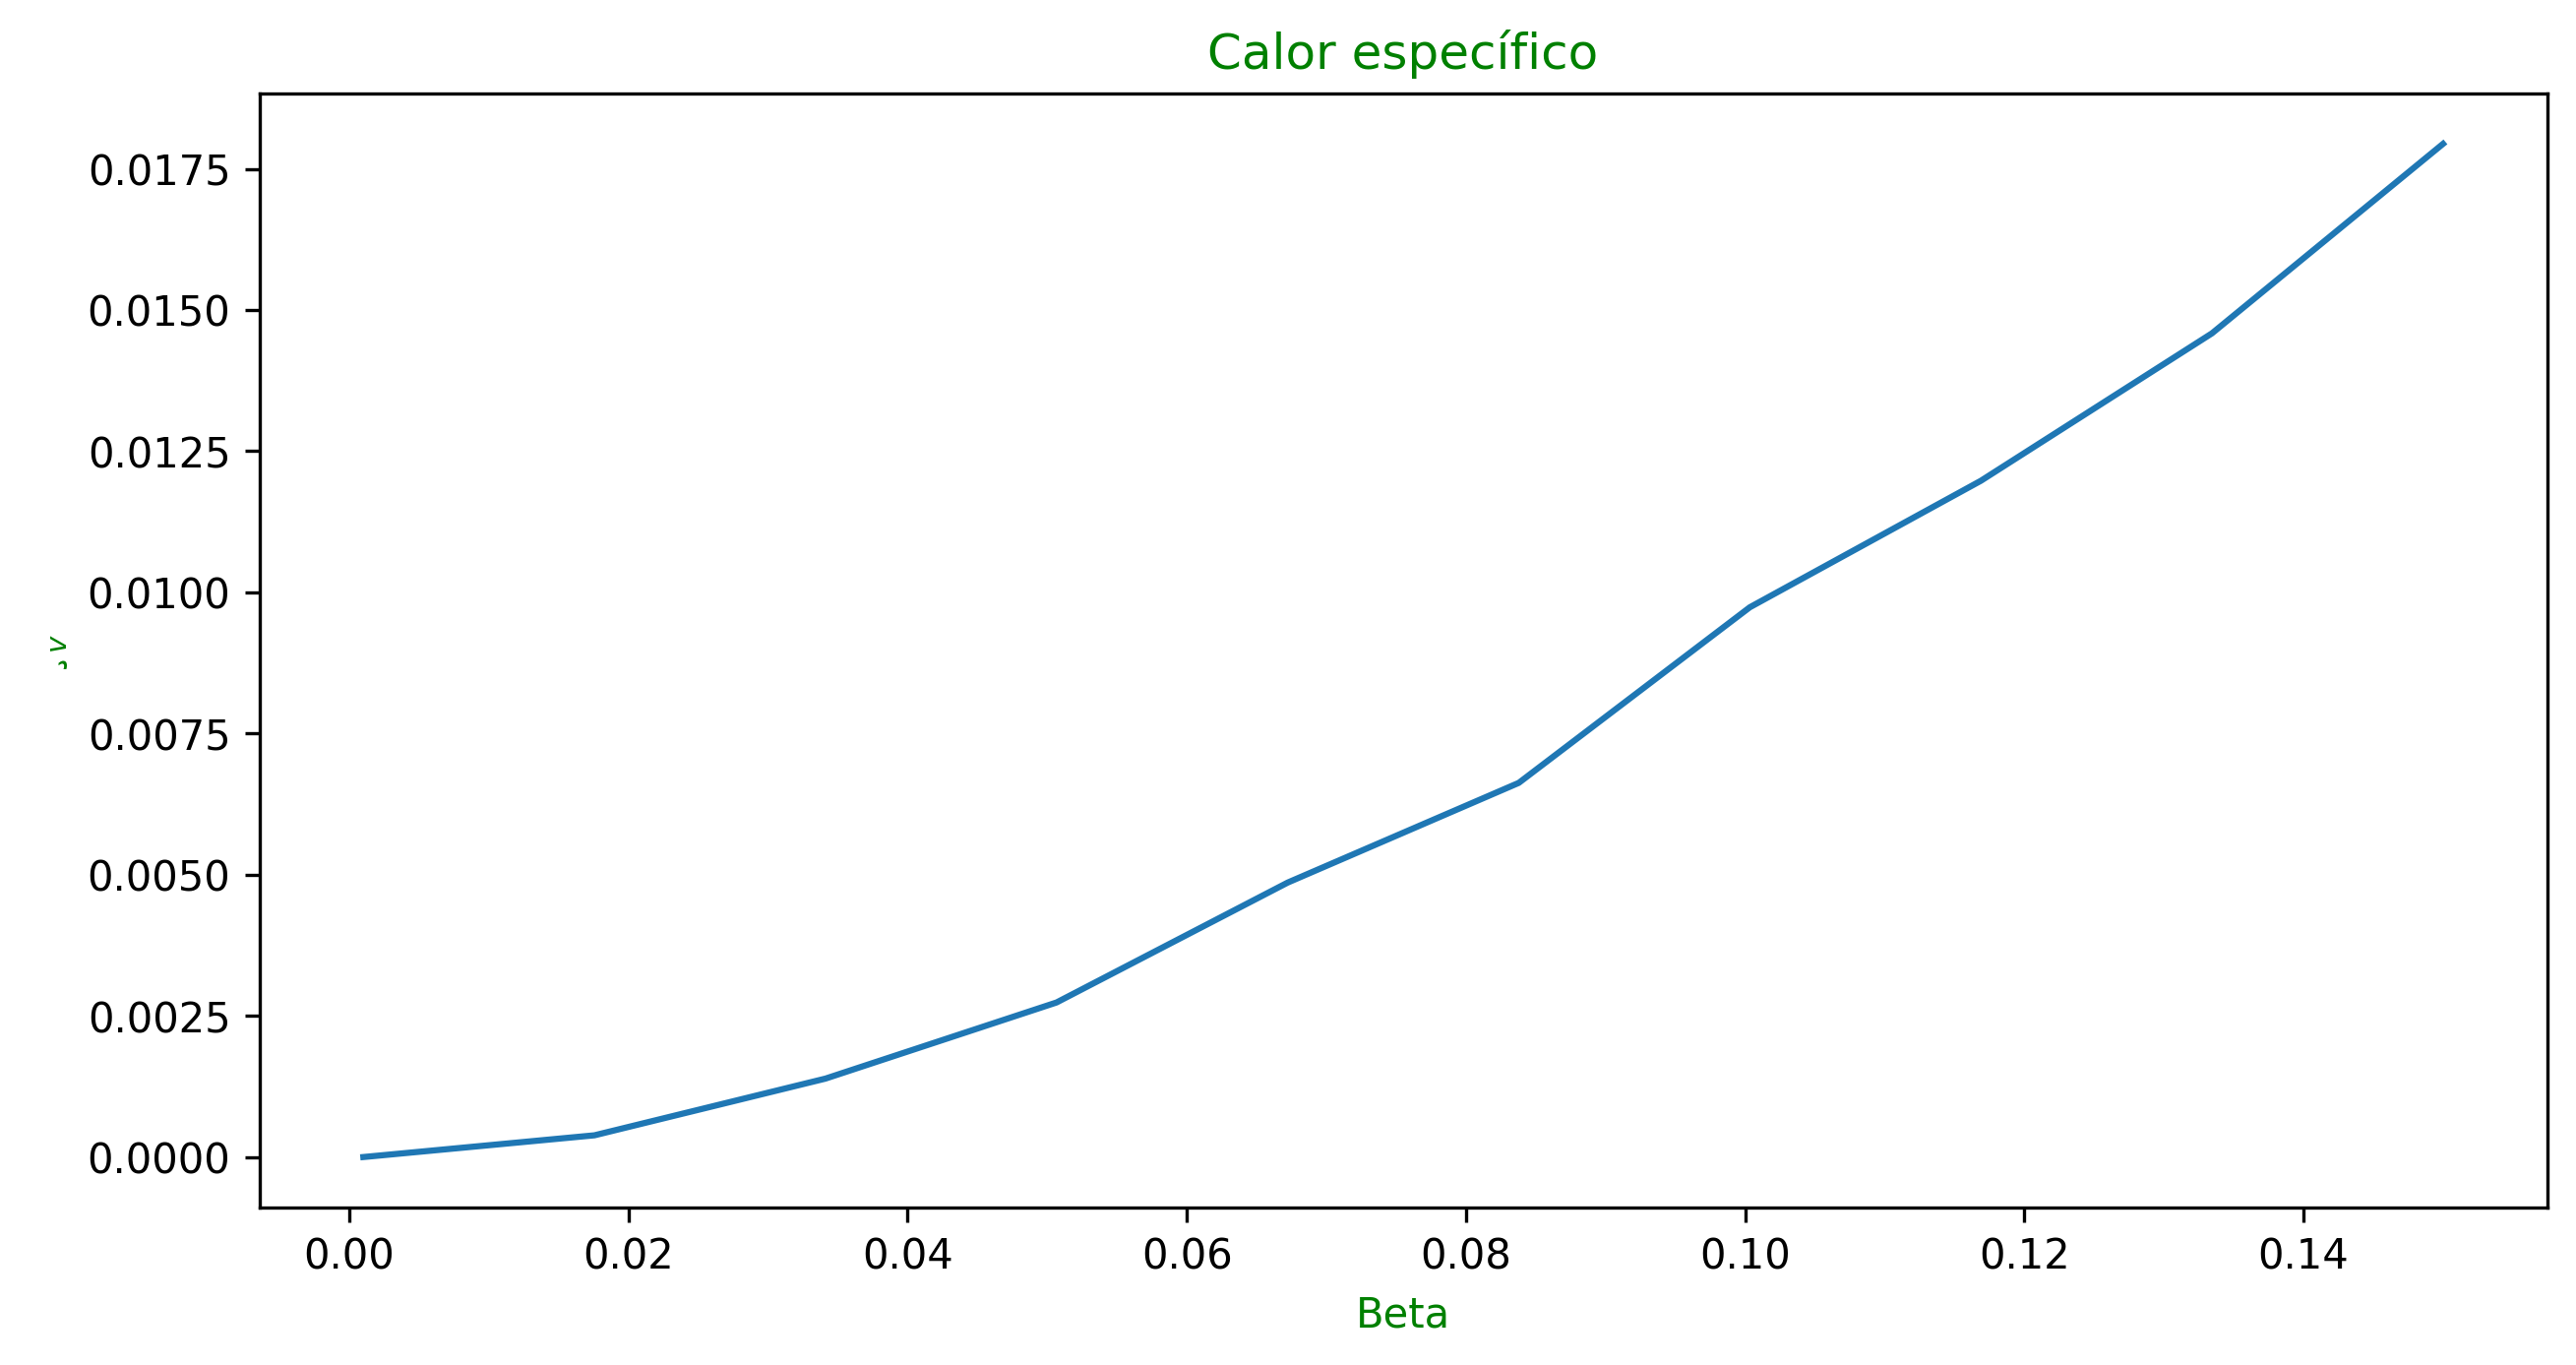

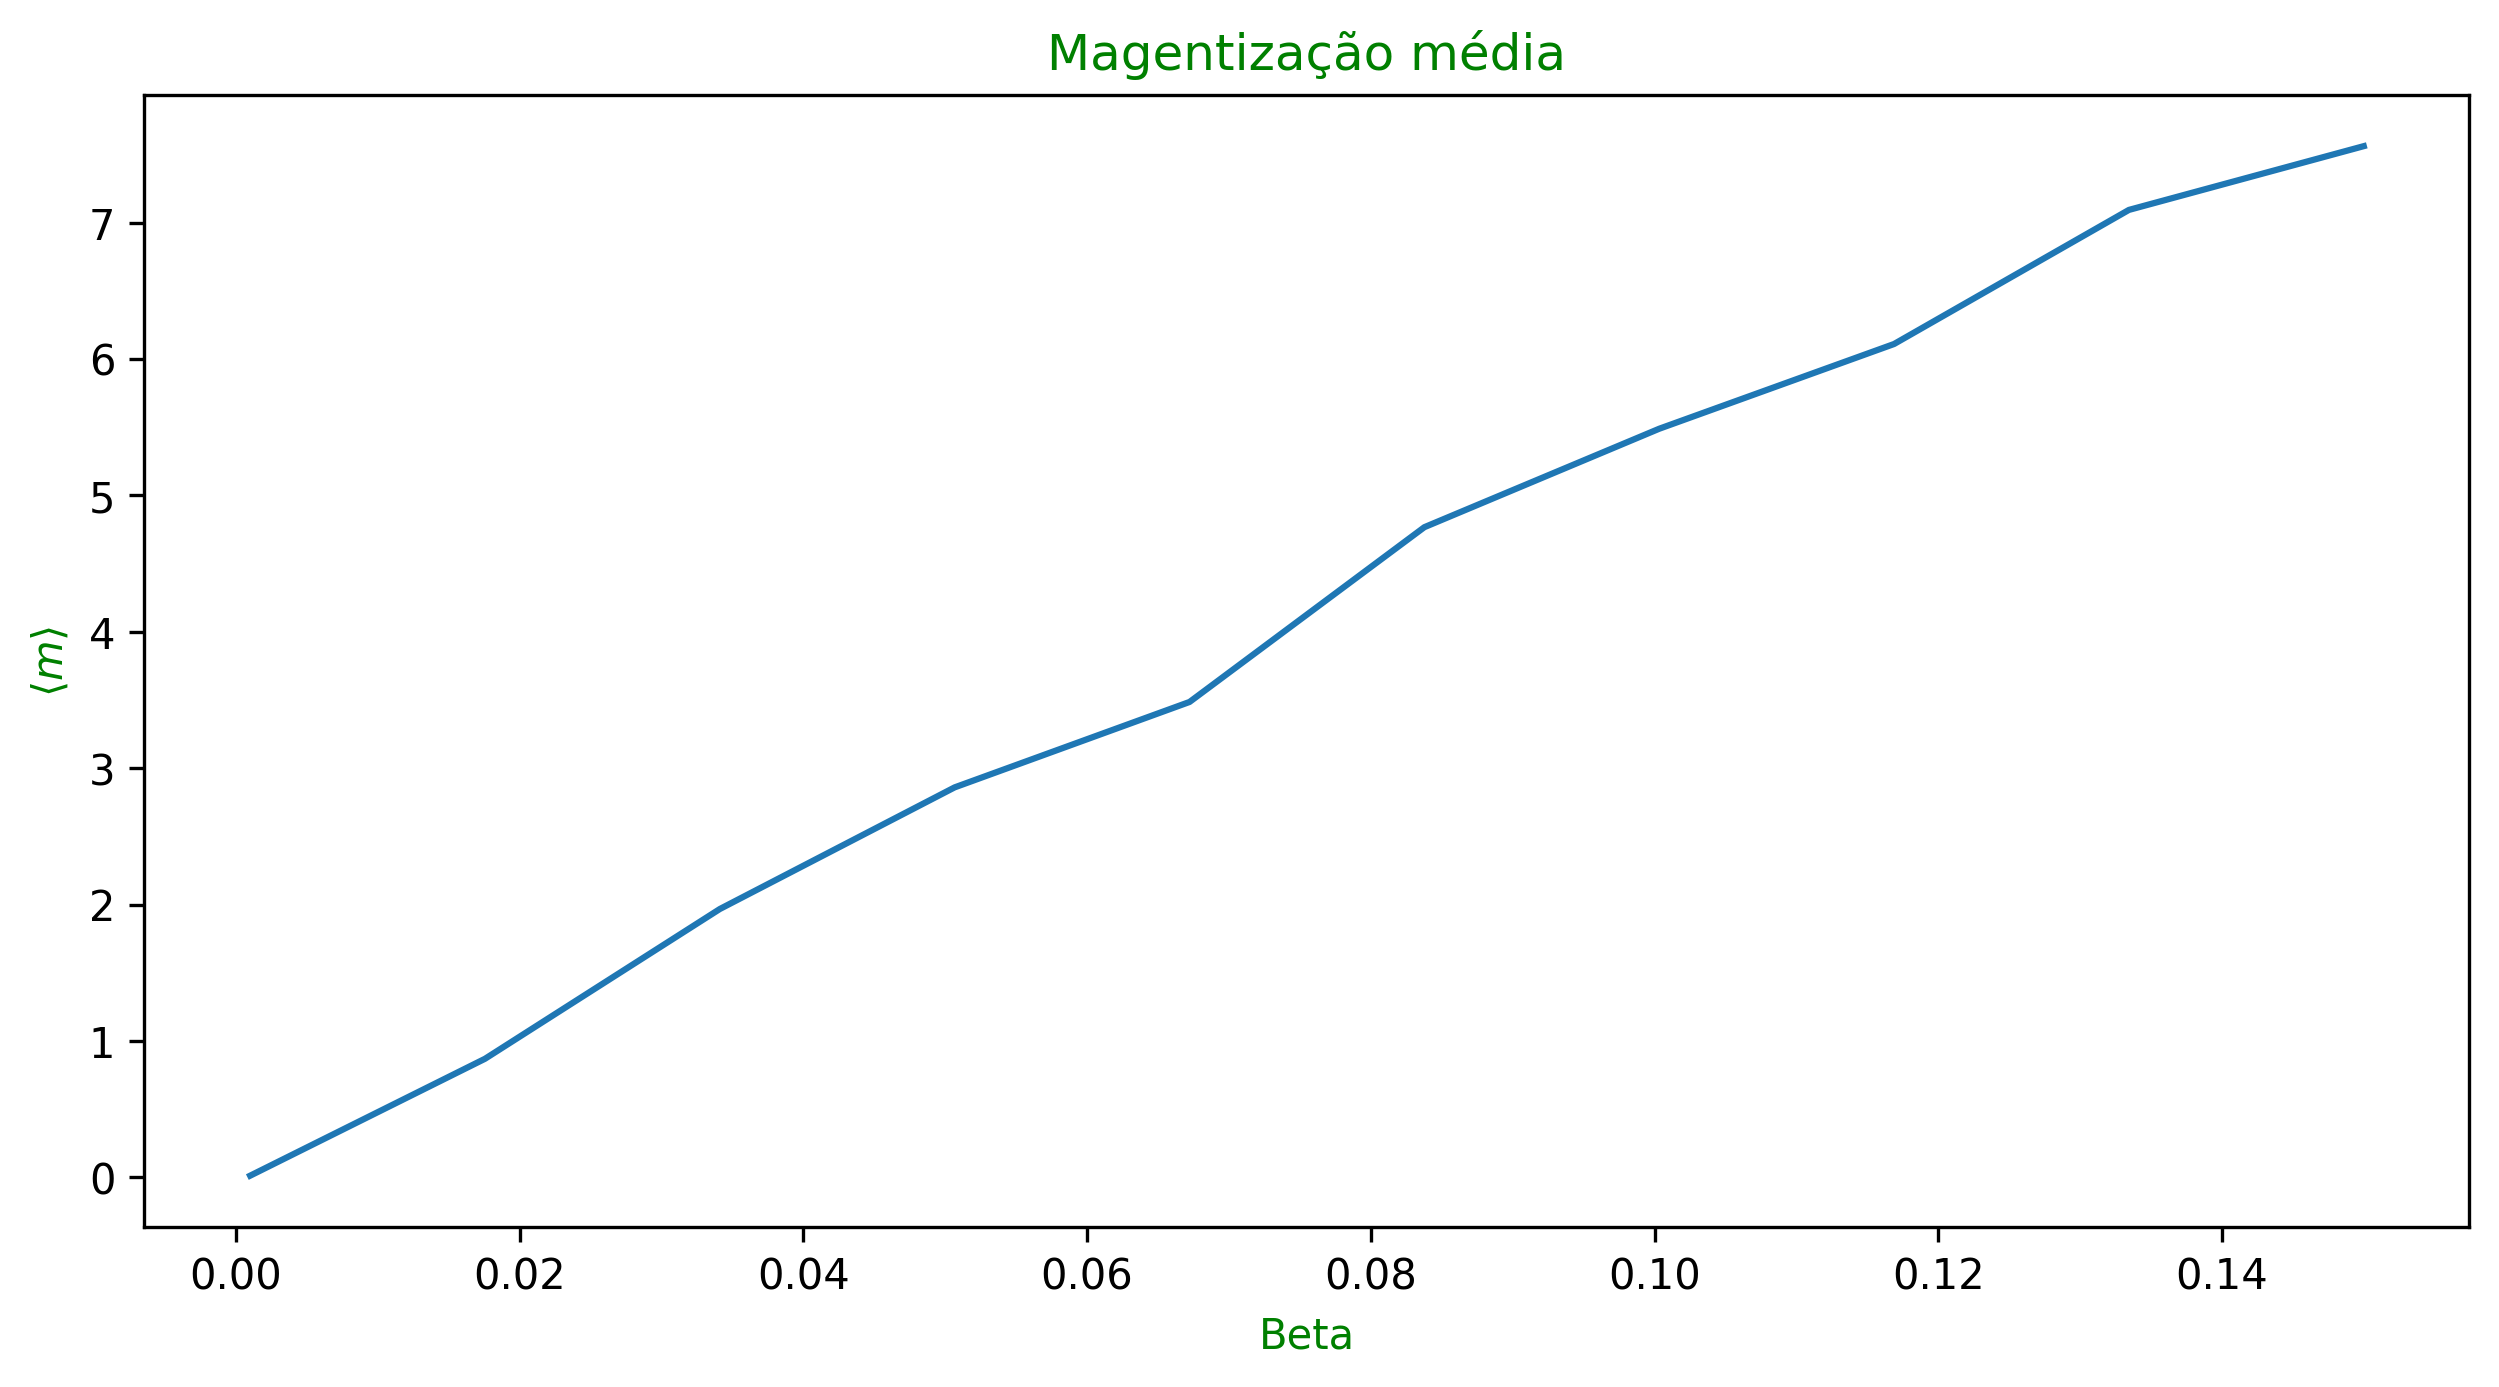

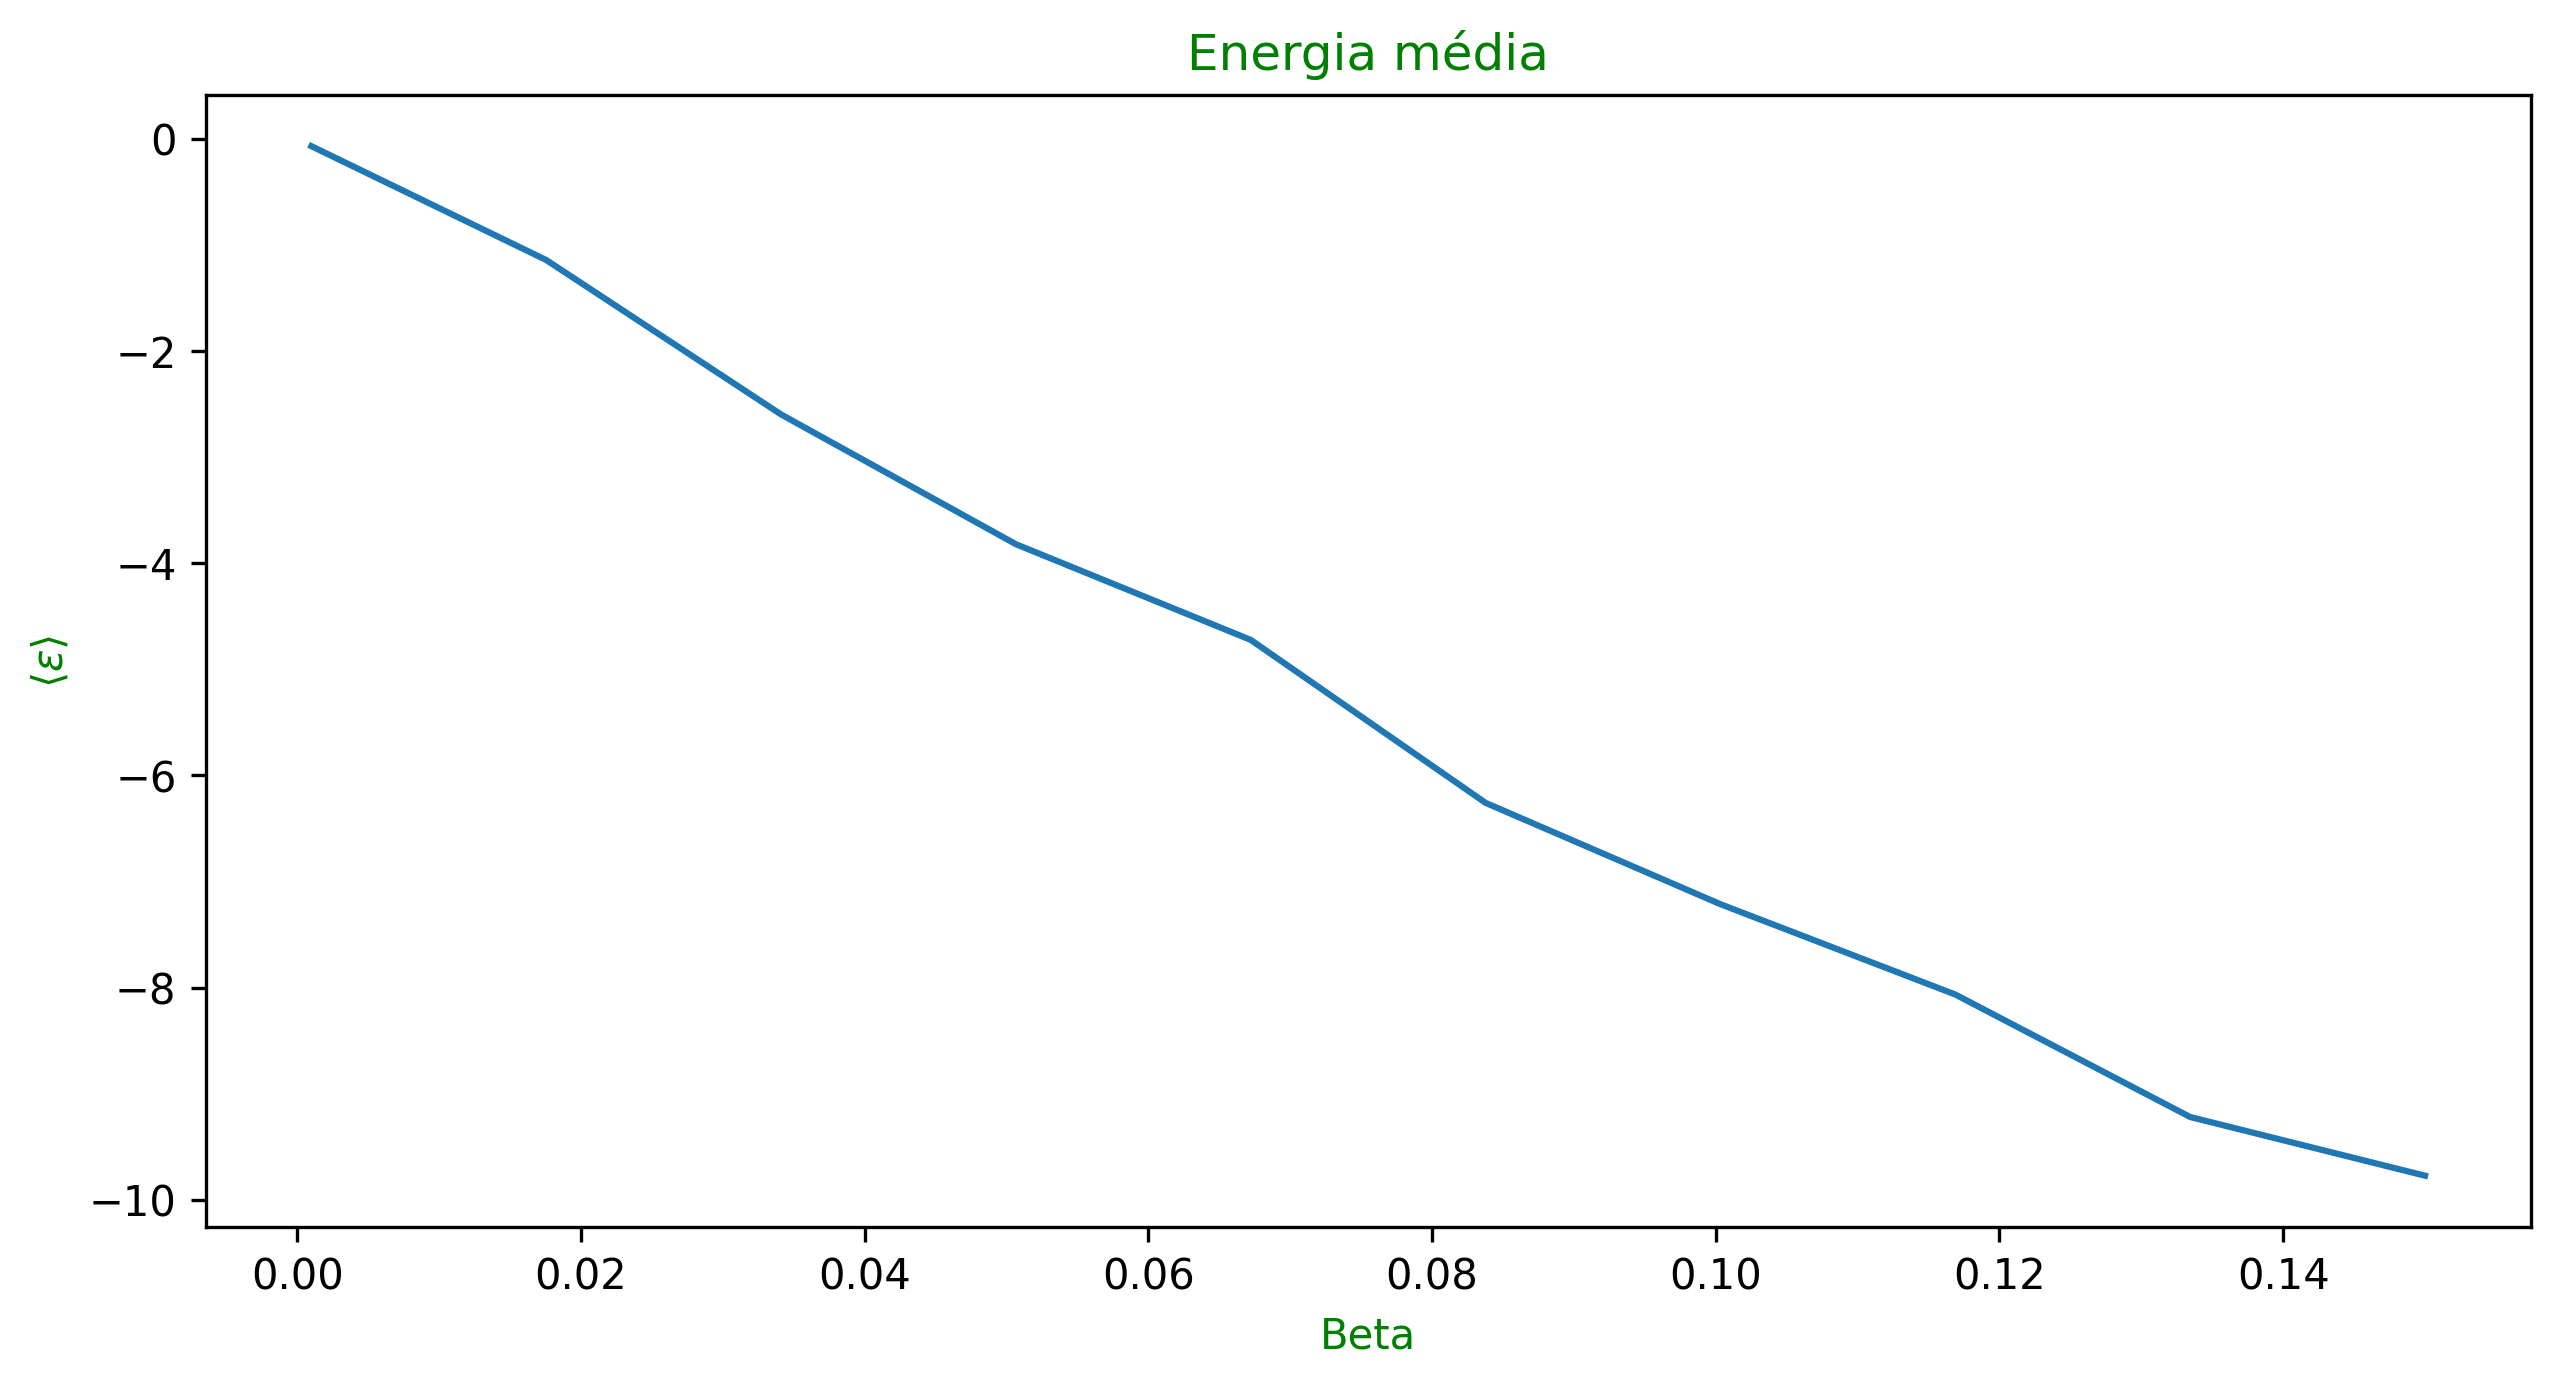

In [21]:
betas = np.linspace(0.001,0.15,10)
J = 0.4; B=1; N=int(1e5)

arrays_m_series_corr = np.empty((50,int(N)))
arrays_e_series_corr = np.empty((50,int(N)))

for k,i in enumerate(betas):
    arrays_m_series_corr[k], arrays_e_series_corr[k] = spin_flip_metropolis_corr(8,N,B,i,J)
    
#vamos deliniar o ciclo de aquecimento em 5000
betas = np.linspace(0.001,0.15,10)

arrays_m_termalizados_corr = arrays_m_series_corr[:,5000:]
arrays_e_termalizados_corr = arrays_e_series_corr[:,5000:]

m_med_corr, e_med_corr = np.empty(10), np.empty(10)
m_var_corr, e_var_corr = np.empty(10), np.empty(10)

for i in range(10):
    m_med_corr[i], e_med_corr[i] = np.mean(arrays_m_termalizados_corr[i,:]), np.mean(arrays_e_termalizados_corr[i,:])
    m_var_corr[i], e_var_corr[i] = np.var(arrays_m_termalizados_corr[i,:]), np.var(arrays_e_termalizados_corr[i,:])
    
    
    
plt.figure(figsize=(10,5), dpi=300)
plt.title("Suscetibilidade Magnética", color="green")
plt.plot(betas, betas * m_var_corr/64)
plt.xlabel("Beta", color="green");plt.ylabel(r"$\chi_m$", color="green")
plt.show()

plt.figure(figsize=(10,5), dpi=300)
plt.title("Calor específico", color="green")
plt.plot(betas,betas**2*e_var_corr/64)
plt.xlabel("Beta", color="green");plt.ylabel(r"$\c_v$", color="green")
plt.show()

plt.figure(figsize=(10,5), dpi=300)
plt.title("Magentização média", color="green")
plt.plot(betas,m_med_corr)
plt.xlabel("Beta", color="green");plt.ylabel(r"$\langle m \rangle$", color="green")
plt.show()

plt.figure(figsize=(10,5), dpi=300)
plt.title("Energia média", color="green")
plt.plot(betas,e_med_corr)
plt.xlabel("Beta", color="green");plt.ylabel(r"$\langle \epsilon \rangle$", color="green")
plt.show()

6. Compare a magnetização e a energia média com as curvas analíticas obtidas nas alíneas 3-4 e com os resultados sem interações. Comente a qualidade desta aproximação de altas temperaturas.

Pelos gráficos em baixo, verifica-se que os três métodos são concordantes no regime $\beta \rightarrow 0$, mas que (relativamente) rapidamente, os modelos com e sem interação começam a divergir, sendo que o método Monte-Carlo tende a acompanhar a curva com interação, quer para a energia quer para a magnetização médias. Ou seja, estas aproximações são boas apenas no regime $T \rightarrow \infty$. De facto, como já foi referido, as aproximações feitas no modelo com interação expandem os cumulantes em torno de $\beta J << 1$.

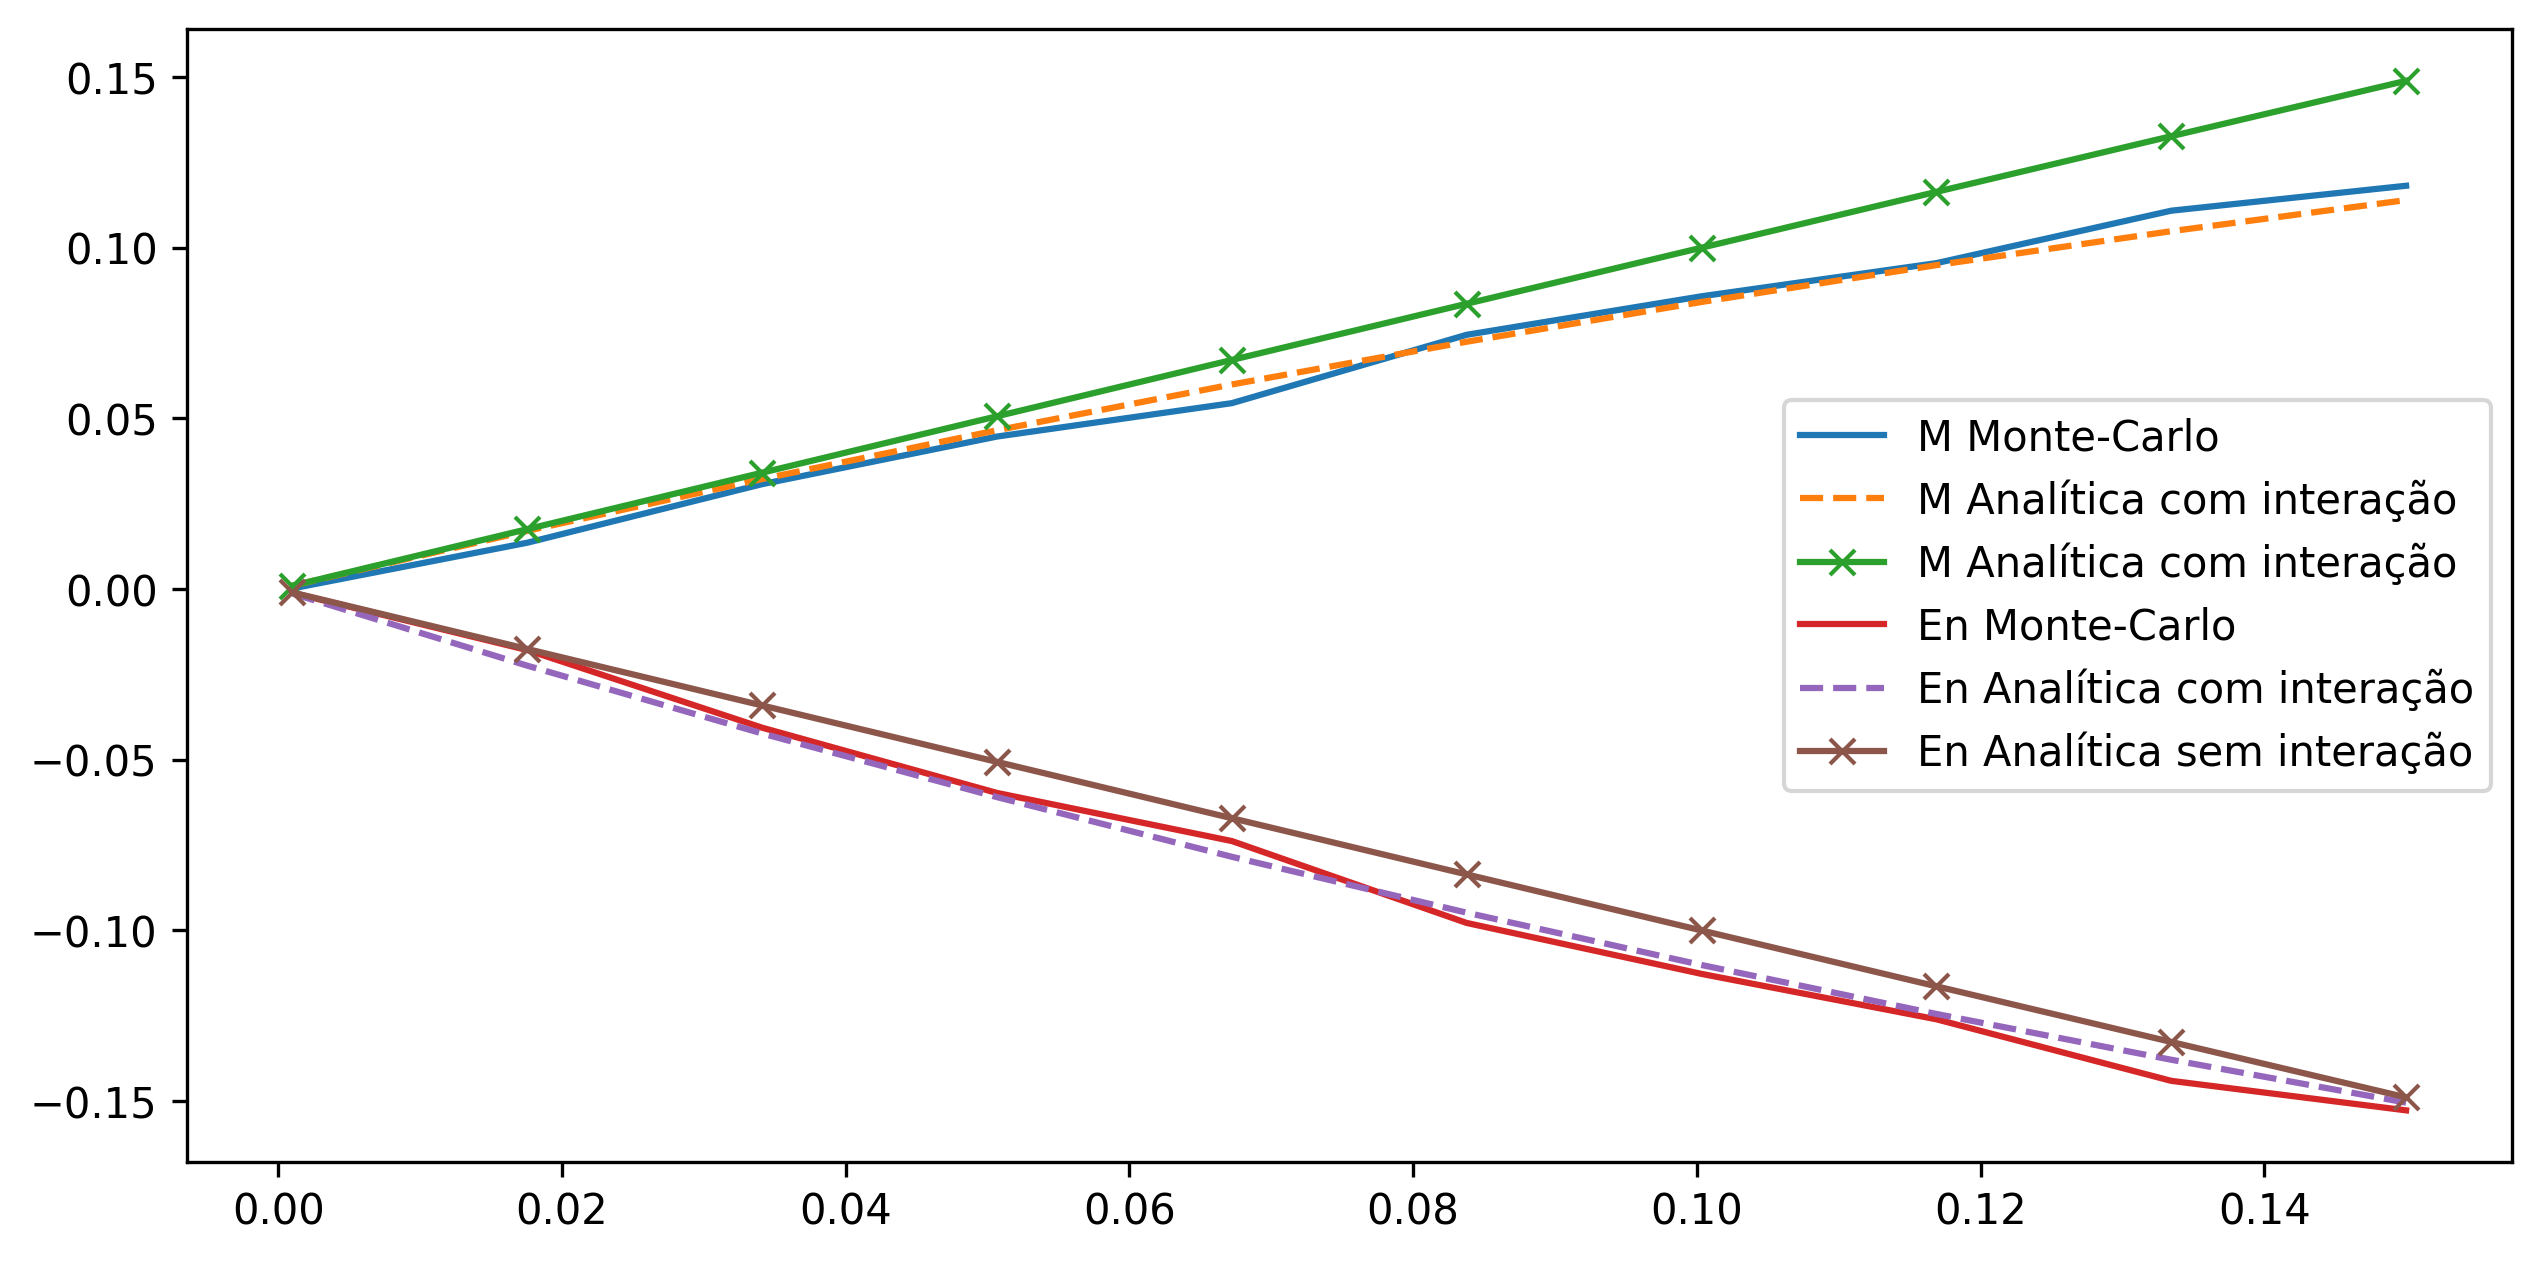

In [22]:
#para evitar erros de variàveis globais, defino as novamente as funções das alineas anteriores
def magnetizacao(beta,mu,B):
    return mu*np.tanh(beta*mu*B)

def m_media(beta,B,J):
    tanh = np.tanh(beta*B)
    return tanh - (4*beta*J)*(tanh - tanh**3)

def u_med(beta,B,J):
    tanh = np.tanh(beta*B)
    termo1 = 2*J*tanh/B
    termo2 = 4*beta*J*(1-tanh**2)
    termo3 = 2*beta*J**2*(1+ 6*tanh**2 - 7*tanh**4)
    return -B*tanh*(1-termo1-termo2)-termo3

def epsilon(beta,mu,B):
    return -mu*B*np.tanh(beta*mu*B)

plt.figure(figsize=(10,5), dpi=300)
plt.plot(betas, m_med_corr/64, label="M Monte-Carlo")
plt.plot(betas, m_media(betas,1,0.4), "--", label="M Analítica com interação")
plt.plot(betas, magnetizacao(betas,1,1), "x-", label="M Analítica com interação")

plt.plot(betas, e_med_corr/64 , label="En Monte-Carlo")
plt.plot(betas, u_med(betas,1,0.4),"--", label="En Analítica com interação")
plt.plot(betas, epsilon(betas,1,1),"x-",  label="En Analítica sem interação")
plt.legend()
plt.show()



## Transição de fase paramagnete-antiferromagnete

A campo magnético nulo, $B\!=\!0$, o sistema pode sofrer uma transição de fase a temperatura finita, de uma fase paramagnética desordenada para uma fase antiferromagnética onde os spins tendem a permanecer antiparalelos aos que estão em seu redor. Esta transição de fase é caracterizada por uma quantidade, o parâmetro de ordem, que é nulo na fase desordenada mas finito na ordenada. Para caracterizar a fase antiferromagnética definimos a magnetização de Neél da seguinte forma:
$$
\mathcal{T}=\frac{1}{N}\left|\sum_{i,j}(-1)^{i+j}S_{i,j}\right|
$$
Se todos os spins forem antiparalelos esta quantidade será 1, tendendo para zero quando as flutuações térmicas começam a destruir a fase ordenada. Por isso, um valor médio finito de $\mathcal{T}$ caracteriza o estado antiferromagnético sendo um parâmetro de ordem adequado. Vamos agora estudar esta transição de fase usando o método de Monte Carlo.

1. Modifique a função de Monte Carlo do exercício anterior para calcular a série temporal da magnetização de Neél, em conjunto com a da energia e magnetização.

#Responda Aqui

In [23]:
#Estas 3 funções são iguais às implementadas no exercício anterior, à exceção do cálculo
#da magnetização de Neél.
def e_tot_corr(L,J,rede):
    soma = 0
    for i in range(L):
        for j in range(L):
            soma += rede[i,j]*(rede[(i+1)%L,j]+rede[(i-1)%L,j]+rede[i,(j+1)%L]+rede[i,(j-1)%L])
    return (J/2)*soma

def delta_E(L,rede, pos, B, beta, J, mu=1):
    x,y = pos
    
    xp, xm = x+1, x-1
    yp, ym = y+1, y-1 #vamos buscar as posições vizinhas
    
    sxp, sxm = rede[xp%L,y], rede[xm%L,y]
    syp, sym = rede[x,yp%L], rede[x,ym%L]
    
    inter_term = 2*J*rede[x,y]*(sxp+sxm+syp+sym)  #termo de interação
    dE = 2*mu*B*rede[x,y] - inter_term  #delta de Energia
    return np.exp(-beta*dE), dE

def metropolis_neel(L,N,B,beta,J,mu=1):
    rede = rd.randint(2,size=L**2)*2-1
    rede = rede.reshape(L,L)
    
    #Transformo o termo (-1)^(i+j) numa matriz
    A = np.ones(L**2)
    i=0
    while i<L:
        A[i*L+(i+1)%2:(i+1)*L:2] *= -1
        i+=1
    A = A.reshape(L,L)
    
    magn_neel = np.empty(N)
    magn = np.empty(N)
    en = np.empty(N)
    
    #No cálculo de mag Neél, multiplico termo a termo a matriz A_{ij} = (-1)^(i+j) com a matriz
    #dos spins, e somo todas as entradas.
    M_neel_in = abs(np.sum(np.multiply(A,rede)))
    
    magn_in = np.sum(rede)
    en_in = magn_in + e_tot_corr(L,J,rede)
    
    M_neel_f = M_neel_in
    for step in range(N):
        pos = (rd.randint(L), rd.randint(L))
        prob, dE = delta_E(L,rede,pos,B,beta,J)
        if rd.random() < prob:
            rede[pos[0],pos[1]] *= -1
            rede_flat = rede.flatten()
            rede_flat[1::2] *= -1
            M_neel_f =  abs(np.sum(np.multiply(A,rede)))
            magn_in += 2*mu*rede[pos[0],pos[1]]
            en_in += dE
        magn[step] =  magn_in
        en[step] =  en_in 
        magn_neel[step] =  M_neel_f
    return magn_neel/(L**2), magn/L**2 , en/L**2, rede

2. Usando $B\!=\!0$ e $J\!=\!1$, calcule $\mathcal{T}$ para $20$ valores de $\beta$ entre $0$ e $2$, com $L\!=\!4,8,16$. Estime o valor de $\beta$ onde ocorre a transição de fase. O que acontece quando $L$ aumenta? Porquê?

Uma forma de estimar a transição de fase é verificar a zona de maior declive durante a transição. Com isto em mente, estimou-se o valor de $\beta$ da transição de fase em $\beta=0.4$, representado na linha vertical.

Quando L aumenta, verifica-se que o parâmetro $\mathcal{T}$ tende mais lentamente para 0, que seria o seu limite a altas temperaturas, devido a flutuações térmicas neste regime. De facto, de acordo com o teorema do limite central, esperamos que estas flutuações térmicas desapareçam à medida que se aumenta o tamanho do sistema. No limite ideal de uma rede infinita, o parâmetro devia ser nulo até à temperatura crítica. 

In [ ]:
n_pontos = 20
betas = np.linspace(0,1,n_pontos)
B=0;J=1; N=1000000

Ls = [4,8,16]
arrays_m_neel_series_neel = np.empty((n_pontos,int(N),3))

for k,i in enumerate(betas):
    for l,L in enumerate(Ls):
        arrays_m_neel_series_neel[k,:,l]= metropolis_neel(L,N,B,i,J)[0]
        
m_neel_med = np.empty((n_pontos,3))

for i in range(n_pontos):
    for j in range(3):
        m_neel_med[i,j] = np.mean(arrays_m_neel_series_neel[i,10000:,j])#termalização de 1e4 passos
    
    
plt.figure(figsize=(16,9), dpi=300)
plt.title("Magentização de Neél", color="green")
plt.plot(betas,m_neel_med[:,0], label="L=6")
plt.plot(betas,m_neel_med[:,1], label="L=8")
plt.plot(betas,m_neel_med[:,2], label="L=16")
plt.vlines(0.4,0.1,1, linestyles="dashdot", colors="red")
plt.xlabel(r"$\beta$", color="green");plt.ylabel(r"$\mathcal{T}$", color="green")
plt.legend()
plt.show()

3. Se $B\!\neq\!0$, então haverá uma competição entre dois efeitos: 1) o paramagnetismo, onde os spins se tendem a alinhar com o campo externo, e 2) o antiferromagnetismo. Dependendo da temperatura e do valor do campo magnético, o sistema pode transitar entre as duas fases. Para $L\!=\!8$ e $J\!=\!1$, represente, em dois $\texttt{pcolor}$, a magnetização e a magnetização de Neél para 5 valores de $B$ entre $0$ e $5$, e 5 valores de $\beta$ entre $0$ e $2$. Se quiser mais resolução nos gráficos, pode utilizar uma maior quantidade de pontos.

Magnetização de Neél:


   Para altas temperaturas, este parâmetro é nulo, como foi visto na alínea anterior, visto que as flutuações térmicas destroem o estado ordenado, sendo que o efeito de B ainda torna mais dificil o sistema ficar num estado antiferromagnético. À medida que $\beta$ aumenta, $\mathcal{T}$ aumenta (seguindo o mesmo padrão da alínea anterior), e para valores pequenos de B, tende de facto para um paramagnete. Contudo, se se aumentar B, verifica-se que a competição entre os dois efeitos tende a diminuir este parâmetro. No limite de B muito alto, o sistema encontra-se praticamente num estado paramagnético.


-------


Magnetização:


Para altas temperaturas, a magnetização é muito baixa, que corresponde ao estado desordenado da rede de spins, sendo que nem um B muito alto consegue ordenar os spins. Para temperaturas baixa. Contudo para temperaturas altas, vemos que a magnetização cresce com o valor de B. De facto, num regime antiferromagnético, com $\beta$ alto e B=0, os spins estão anti-simétricos e portanto a magnetização é nula. Mas à medida que B aumenta, os spins tendem a alinhar-se com o campo magnético, e a magnetização aumenta.


----

Por fim, note-se que os gráficos são quase "complementares" um do outro i.e. quando um é maximo, o outro é minimo. De facto, na fase antiferromagnética, $m=0$ mas $\mathcal{T}=1$, enquanto que após a transição de fase ocorre o oposto.


In [ ]:
n_pontos = 10

Bs = np.linspace(0,5,n_pontos)
betas = np.linspace(0,2,n_pontos)

magnetizacao = np.empty((n_pontos,n_pontos))
mag_neel = np.empty((n_pontos,n_pontos))

for i, B in enumerate(Bs):
    for j,beta in enumerate(betas):
        [M_neel, M_classico] = metropolis_neel(8,100000,B,beta,1)[0:2]
        magnetizacao[i,j] = np.mean(M_classico[10000:])
        mag_neel[i,j] = np.mean(M_neel[10000:])

plt.figure(figsize=(16,9))
plt.title("Magnetização", color="green")
plt.imshow(magnetizacao, origin="lower", extent = [0.0 ,2.0, 0.0 ,5.0] , aspect='auto')
plt.ylabel("Campo Magnético", color="green")
plt.xlabel("Beta", color="green")
plt.colorbar()
plt.show()

plt.figure(figsize=(16,9))
plt.title("Magnetização de Neél", color="green")
plt.imshow(mag_neel, origin="lower", extent = [0.0 ,2.0, 0.0 ,5.0] , aspect='auto')
plt.ylabel("Campo Magnético", color="green")
plt.xlabel("Beta", color="green")
plt.colorbar()
plt.show()
t2 = time.time()
print((t2-t1)/60)

Bom Trabalho!